# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import pandas as pd

# Directories of the training, validation and testing data
training_file = "traffic-signs-data/train.p"
validation_file = "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

sign_names = pd.read_csv("signnames.csv", index_col='ClassId', header=0)
sign_names = sign_names["SignName"]
print (sign_names)

ClassId
0                                  Speed limit (20km/h)
1                                  Speed limit (30km/h)
2                                  Speed limit (50km/h)
3                                  Speed limit (60km/h)
4                                  Speed limit (70km/h)
5                                  Speed limit (80km/h)
6                           End of speed limit (80km/h)
7                                 Speed limit (100km/h)
8                                 Speed limit (120km/h)
9                                            No passing
10         No passing for vehicles over 3.5 metric tons
11                Right-of-way at the next intersection
12                                        Priority road
13                                                Yield
14                                                 Stop
15                                          No vehicles
16             Vehicles over 3.5 metric tons prohibited
17                                      

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = y_train.shape[0]

# Number of validation examples
n_validation = y_valid.shape[0]

# Number of testing examples
n_test = y_test.shape[0]

# The shape of an traffic sign image
image_shape = X_train[0].shape

# Number of classes/labels in the dataset
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

### Check data distribution

It is important that the training, validation, and test sets have the same data distribution, because the training set is supposed to be an unbiased representation for the test set.
Since the validation set is used to tune the parameters, it should also have the same distribution as the test set.
Otherwise, the final test performance is not expected to be good.

The following histogram plots reveals that all test sets share roughly the same distribution.

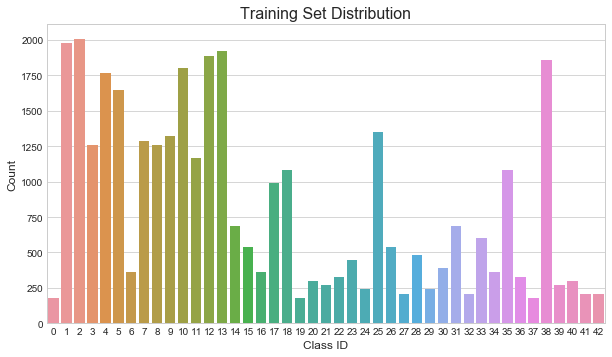

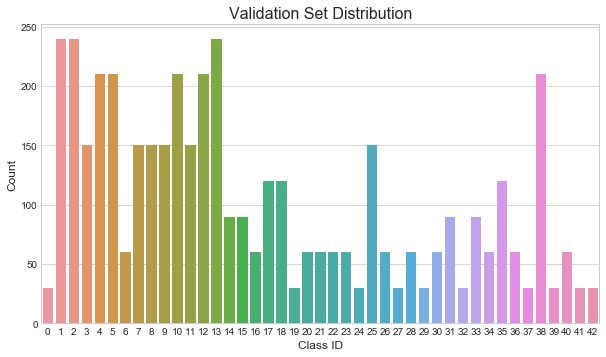

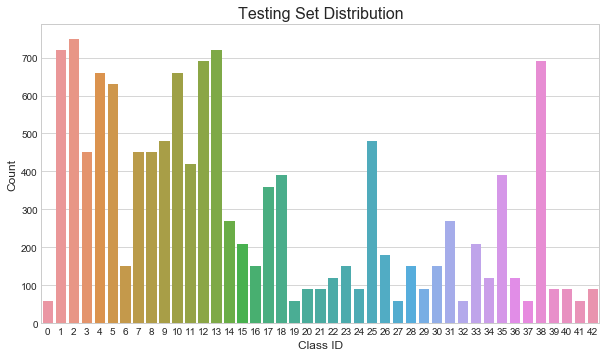

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

def plot_dist(labeled_data, title):
    """ Plot data distribution.
    labeled_data -- the labeled data
    title -- title of the plot
    """
    
    plt.figure(figsize=(10,5.5))
    ax = sns.countplot(x=labeled_data)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Class ID', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    plt.show()
    
    return

plot_dist(y_train, "Training Set Distribution")
plot_dist(y_valid, "Validation Set Distribution")
plot_dist(y_test, "Testing Set Distribution")

### Check Some Raw Data

The following cell show 25 images from the training set and their corresponding labels.

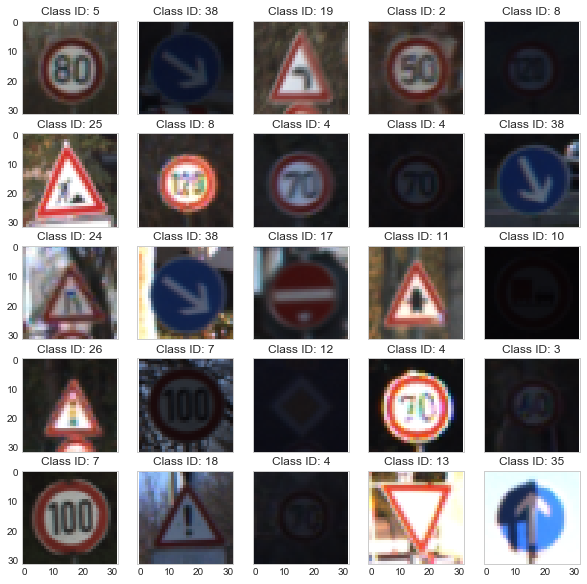

Discription for the appeared Class ID:
ID                                        Discription
 2                               Speed limit (50km/h)
 3                               Speed limit (60km/h)
 4                               Speed limit (70km/h)
 5                               Speed limit (80km/h)
38                                         Keep right
 7                              Speed limit (100km/h)
 8                              Speed limit (120km/h)
35                                         Ahead only
10       No passing for vehicles over 3.5 metric tons
11              Right-of-way at the next intersection
12                                      Priority road
13                                              Yield
17                                           No entry
18                                    General caution
19                        Dangerous curve to the left
24                          Road narrows on the right
25                                         

In [4]:
def plot_raw(nrow, ncol):
    """ Plot raw training images for nrow rows and ncol columns. """
    
    fig, axs = plt.subplots(nrows=nrow, ncols=ncol, sharex=True, sharey=True, figsize=(2*ncol, 2*nrow))
    
    explored = []
    IDs = []
    for i in range(nrow):
        for j in range(ncol):
            index = np.random.randint(0, len(X_train))
            while index in explored:
                index = np.random.randint(0, len(X_train))
            explored.append(index)
            IDs.append(y_train[index])
            image = X_train[index].squeeze()
            
            axs[i][j].imshow(image)
            axs[i][j].set_title("Class ID: {0}".format(y_train[index]))

            axs[i][j].set_xticks([0, 10, 20, 30])
            axs[i][j].set_yticks([0, 10, 20, 30])

            axs[i][j].grid(False)
    plt.show()
    
    print ("Discription for the appeared Class ID:")
    print ("{0:2s} {1:>50s}".format("ID", "Discription"))
    for i in set(IDs):
        print ("{0:2d} {1:>50s}".format(i, sign_names[i]))
    
    return

plot_raw(5, 5)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.

def preprocess_normalization1(data):
    """ Preprocess the data to make them with roughly equal mean and variance.
    formula: ( pixel - 128.0 ) / 128.0
    """
    return (data - 128.0) / 128.0

def preprocess_normalization2(data):
    """ Preprocess the data to make them with roughly equal mean and variance.
    formula: pixel / 255.0
    """
    return data / 255.0

def preprocess_gray(data):
    """ Preprocess the data to gray scale according to the formula 0.299 * R + 0.587 * G + 0.114 * B.
    data -- the raw images with RGB channels.
    
    return: gray scaled images
    """
    return np.dot(data[..., :3], [[0.299], [0.587], [0.114]])

def initialize_data1(train, valid, test):
    """ Initailze the training, validation, and test data sets by applying normalization scheme 1. """
    
    train = preprocess_normalization1(train)
    valid = preprocess_normalization1(valid)
    test = preprocess_normalization1(test)
    
    return train, valid, test

def initialize_data2(train, valid, test):
    """ Initailze the training, validation, and test data sets by applying normalization scheme 2. """
    
    train = preprocess_normalization2(train)
    valid = preprocess_normalization2(valid)
    test = preprocess_normalization2(test)
    
    return train, valid, test

def initialize_data_g1(train, valid, test):
    """ Initailze the training, validation, and test data sets by
    applying normalization scheme 1 on gray scaled images. """
    
    train = preprocess_normalization1(preprocess_gray(train))
    valid = preprocess_normalization1(preprocess_gray(valid))
    test = preprocess_normalization1(preprocess_gray(test))
    
    return train, valid, test

def initialize_data_g2(train, valid, test):
    """ Initailze the training, validation, and test data sets by
    applying normalization scheme 2 on gray scaled images. """
    
    train = preprocess_normalization2(preprocess_gray(train))
    valid = preprocess_normalization2(preprocess_gray(valid))
    test = preprocess_normalization2(preprocess_gray(test))
    
    return train, valid, test

### Data augmentation

By looking at the training data, we see that the images have varying brightness.
To increase the translational and perspective invariance, it is a good idea to augment the data by warping and moving the original images.
I will generate 20 % new images of the training and validation sets.
Then shuffle them again and branch out 15 % of the total (training + validation) images as the new validation set.

The funtions of OpenCV are found [here](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html).

In [6]:
import cv2, sklearn
from sklearn.model_selection import train_test_split

def augment_data(X_train, X_valid, Y_train, Y_valid, aug_scale):
    """ Augment the training and validation data and return the new ones. """
    
    N = X_train.shape[0] + X_valid.shape[0]
    Nnew = int(N * (1.0 + aug_scale))
    
    X = np.append(X_train, X_valid, axis=0)
    Y = np.append(Y_train, Y_valid, axis=0)
    
    while X.shape[0] != Nnew:
        # show progress
        if (X.shape[0] - N) % 500 == 0:
            print ( "Progress {:6.2f}% ...".format( 100 * (X.shape[0] - N) / (Nnew - N) ) )
        
        # random an index
        index = np.random.randint(0, N)
        x = X[index]
        y = Y[index]
        nrows, ncols = x.shape[:2]
        size = (nrows, ncols)
        center = (nrows/2, ncols/2)
        
        # random brightness
        brightness_transformer = 1.0 + np.random.uniform(-0.35, 0.35)
        x_hsv = cv2.cvtColor(x, cv2.COLOR_RGB2HSV)
        x_hs = x_hsv[:,:,2] * brightness_transformer
        x_hs[x_hs > 255] = 255
        x_hsv[:,:,2] = x_hs
        x = cv2.cvtColor(x_hsv, cv2.COLOR_HSV2RGB)
        
        # random affine / shear
        px_shear = np.random.randint(-3, 3)
        py_shear = np.random.randint(-3, 3)
        pts1_shear = np.float32([[5, 5], center, [5, ncols - 5]])
        pts2_shear = np.float32([[5 + px_shear, 5 + py_shear], center, [5 + px_shear, ncols - 5 + py_shear]])
        shear_transformer = cv2.getAffineTransform(pts1_shear, pts2_shear)
        x = cv2.warpAffine(x, shear_transformer, size)
        
        # random rotation
        rotation_angle = np.random.uniform(-5, 5)
        rotation_transformer = cv2.getRotationMatrix2D(center, rotation_angle, 1)
        x = cv2.warpAffine(x, rotation_transformer, size)
        
        # random translations
        px_trans = np.random.randint(-3, 3)
        py_trans = np.random.randint(-3, 3)
        translation_transformer = np.float32([ [1,0,px_trans], [0,1,py_trans] ])
        x = cv2.warpAffine(x, translation_transformer, size)

        # random perspective
        px_enlarge = np.random.randint(4)
        pt1_enlarge = np.float32([[px_enlarge, px_enlarge], [px_enlarge, ncols - px_enlarge],
                                  [nrows - px_enlarge, px_enlarge], [nrows - px_enlarge, ncols - px_enlarge]])
        pt2_enlarge = np.float32([[0,0], [0,ncols], [nrows, 0], [nrows, ncols]])
        perspective_transformer = cv2.getPerspectiveTransform(pt1_enlarge, pt2_enlarge)
        x = cv2.warpPerspective(x, perspective_transformer, size)
        
        X = np.append(X, [x], axis=0)
        Y = np.append(Y, [y], axis=0)
    print ( "Progress {:6.2f}% ... Done.".format(100.0) )
    
    Xtrain, Xvalid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.20)
    
    return Xtrain, Xvalid, Y_train, Y_valid

Progress   0.00% ...
Progress   6.38% ...
Progress  12.75% ...
Progress  19.13% ...
Progress  25.51% ...
Progress  31.88% ...
Progress  38.26% ...
Progress  44.64% ...
Progress  51.01% ...
Progress  57.39% ...
Progress  63.77% ...
Progress  70.14% ...
Progress  76.52% ...
Progress  82.90% ...
Progress  89.27% ...
Progress  95.65% ...
Progress 100.00% ... Done.


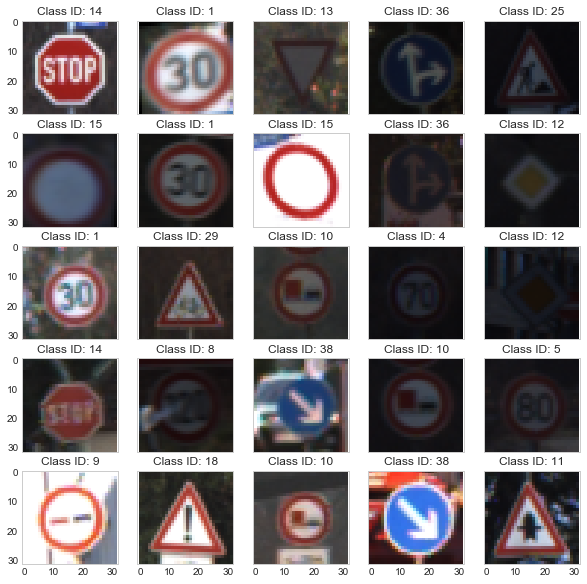

Discription for the appeared Class ID:
ID                                        Discription
 1                               Speed limit (30km/h)
36                               Go straight or right
 4                               Speed limit (70km/h)
38                                         Keep right
 5                               Speed limit (80km/h)
 8                              Speed limit (120km/h)
 9                                         No passing
10       No passing for vehicles over 3.5 metric tons
11              Right-of-way at the next intersection
12                                      Priority road
13                                              Yield
14                                               Stop
15                                        No vehicles
18                                    General caution
25                                          Road work
29                                  Bicycles crossing
Number of training examples = 37640
Number 

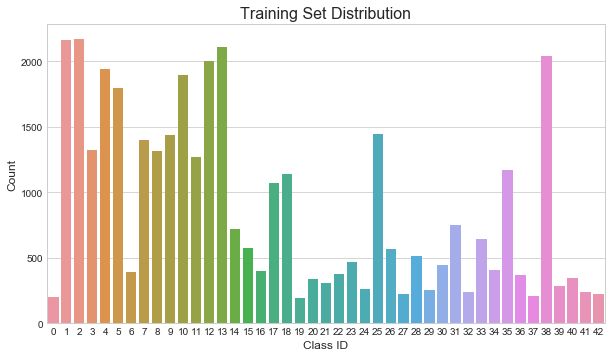

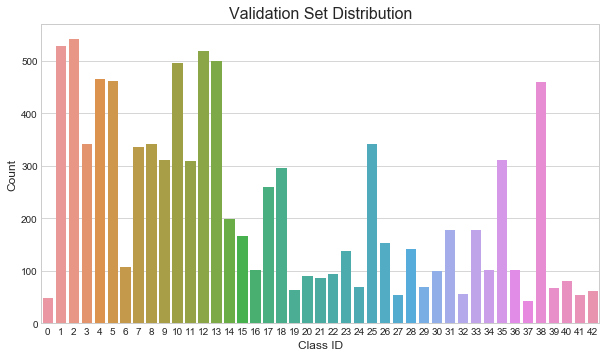

In [7]:
# data augmentation
X_train, X_valid, y_train, y_valid = augment_data(X_train, X_valid, y_train, y_valid, 0.20)

# plot new data set
plot_raw(5, 5)

print("Number of training examples =", y_train.shape[0])
print("Number of validation examples =", y_valid.shape[0])

plot_dist(y_train, "Training Set Distribution")
plot_dist(y_valid, "Validation Set Distribution")

# save to train map
train['features'], valid['features'], train['labels'], valid['labels'] = X_train, X_valid, y_train, y_valid

#### Observation from data augmentation

After reshuffling the data, we see an improved data distribution for the training and validation sets.

### Model Architecture

### LeNet-5

The original LeNet-5 model is used to recognize hand-written numbers (0 - 9).
Here is the work flow of the LeNet-5 architecture.
![LeNet Architecture](images/LeNet.png)

- **Input Layer**: 32 $\times$ 32 $\times$ 1 images.
- **Layer 1**:
    - Convolutions: 6 features of 28 $\times$ 28.
    - Subsampling (pooling): 6 features of 14 $\times$ 14.
- **Layer 2**:
    - Convolutions: 16 features of 10 $\times$ 10.
    - Subsampling (pooling): 16 features of 5 $\times$ 5.
- **Layer 3**: Fully connected layer of shape 120.
- **Layer 4**: Fully connected layer of shape 84.
- **Layer 5**: Output layer (10 numbers).

#### Initialize parameters for weights and biases

In [8]:
import tensorflow as tf
import sklearn

def initialize_parameters(dims_list):
    """ Initilaze parameters for weights and biases.
    dims -- a list of dimensions of weights
    
    return: a parameters map {"W1": W1, "b1": b1, ...}
    """
    
    parameters = {}
    
    n = len(dims_list)
    for i in range(n):
        nameW, nameb = "W" + str(i + 1), "b" + str(i + 1)
        W = tf.get_variable(nameW, dims_list[i], initializer=tf.contrib.layers.xavier_initializer())
        b = tf.Variable(tf.zeros(shape=(dims_list[i][-1])), name=nameb)
#         b = tf.get_variable(nameb, [1, dims_list[i][-1]], initializer = tf.zeros_initializer())
        parameters[nameW] = W
        parameters[nameb] = b
    
    return parameters

# some test on initialize_parameters function
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters( [[5,5,3,6], [5,5,6,16], [400,120], [120,84], [84, 43]] )
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print("W3 = " + str(parameters["W3"]))
    print("b3 = " + str(parameters["b3"]))
    print("W4 = " + str(parameters["W4"]))
    print("b4 = " + str(parameters["b4"]))
    print("W5 = " + str(parameters["W5"]))
    print("b5 = " + str(parameters["b5"]))

W1 = Tensor("W1/read:0", shape=(5, 5, 3, 6), dtype=float32)
b1 = Tensor("b1/read:0", shape=(6,), dtype=float32)
W2 = Tensor("W2/read:0", shape=(5, 5, 6, 16), dtype=float32)
b2 = Tensor("b2/read:0", shape=(16,), dtype=float32)
W3 = Tensor("W3/read:0", shape=(400, 120), dtype=float32)
b3 = Tensor("b3/read:0", shape=(120,), dtype=float32)
W4 = Tensor("W4/read:0", shape=(120, 84), dtype=float32)
b4 = Tensor("b4/read:0", shape=(84,), dtype=float32)
W5 = Tensor("W5/read:0", shape=(84, 43), dtype=float32)
b5 = Tensor("b5/read:0", shape=(43,), dtype=float32)


#### Create placeholders for data and labels

In [9]:
def create_placeholders(Xdim, nY):
    """ Createa placeholders for X and Y.
    Xdim -- the dimensions of one image in X (32, 32, 3)
    nY -- the number of classes (43)
    
    return:
    X -- placeholder for input images of shape [None, 32, 32, 3] and dtype "float"
    Y -- placeholder for image labels of shape [None, 43] and dtype "int"
    keep_prob -- kept probability for dropout
    """
    
    shapeX = [None]
    shapeX.extend(Xdim)
    X = tf.placeholder(shape=shapeX, dtype="float32", name="X")
    Y = tf.placeholder(tf.int32, shape=(None), name="Y")
    Y_one_hot = tf.one_hot(Y, nY)
#     Y = tf.placeholder(shape=[None, nY], dtype="float32", name="Y")
    
    keep_prob = tf.placeholder(tf.float32, name="keep_prob")
    
    return X, Y, Y_one_hot, keep_prob

# some test on create_placeholders function
tf.reset_default_graph()
with tf.Session() as sess:
    X, Y, Y_one_hot, keep_prob = create_placeholders([32,32,3], 43)
    print ("X = " + str(X))
    print ("Y = " + str(Y))
    print ("Y_one_hot = " + str(Y_one_hot))
    print ("keep_prob = " + str(keep_prob))

X = Tensor("X:0", shape=(?, 32, 32, 3), dtype=float32)
Y = Tensor("Y:0", dtype=int32)
Y_one_hot = Tensor("one_hot:0", dtype=float32)
keep_prob = Tensor("keep_prob:0", dtype=float32)


#### Forward propagation of modified LeNet-5

It seems to me the numbers of in- and out- hidden units in Layer 4 of LeNet-5 are similar.

Thus it can be ignored if user specify the number of fully connected layers.

In [10]:
def forward_propagation_LeNet5(X, parameters, keep_prob, n_fc = 2):
    """ Forward propagation using LeNet-5 architecture.
    
    (CONV -> RELU -> POOL) -> (CONV -> RELU -> POOL) -> (LINEAR -> RELU) -> (LINEAR -> RELU) -> LINEAR -> SOFTMAX
    
    X -- the placeholder of shape (n_examples, 32, 32, 3)
    parameters -- the parameters map from initialize_parameters
    keep_prob -- the keep probability for dropout in fully connected layers
    n_fc -- number of fully connected layers
    
    returns: the output of the last LINEAR unit
    """
    
    # Layer 1: INPUT (32,32,3) -> CONV (28,28,6) -> RELU -> POOL (14,14,6)
    W1, b1 = parameters["W1"], parameters["b1"]
    Z1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding="VALID")
    Z1 = tf.nn.bias_add(Z1, b1)
    
    A1 = tf.nn.relu(Z1)
    
    A1 = tf.nn.max_pool(A1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    # Layer 2: CONV (10,10,16) -> RELU -> POOL (5,5,16)
    W2, b2 = parameters["W2"], parameters["b2"]
    Z2 = tf.nn.conv2d(A1, W2, strides=[1,1,1,1], padding="VALID")
    Z2 = tf.nn.bias_add(Z2, b2)
    
    A2 = tf.nn.relu(Z2)
    
    A2 = tf.nn.max_pool(A2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    # Layer 3: fully connected, 400 -> 120
    A2 = tf.contrib.layers.flatten(A2)
    W3, b3 = parameters["W3"], parameters["b3"]
    Z3 = tf.matmul(A2, W3) + b3
    
    A3 = tf.nn.relu(Z3)
    A3 = tf.nn.dropout(A3, keep_prob=keep_prob)
    
    # Layer 4: fully connected, 120 -> 84
    W4, b4 = parameters["W4"], parameters["b4"]
    Z4 = tf.matmul(A3, W4) + b4
    if n_fc == 1:
        return Z4
    
    A4 = tf.nn.relu(Z4)
    A4 = tf.nn.dropout(A4, keep_prob=keep_prob)
    
    # Layer 5: fully connected, 84 -> 43
    W5, b5 = parameters["W5"], parameters["b5"]
    Z5 = tf.matmul(A4, W5) + b5
    
    return Z5

# some test on forward_propagation_LeNet5 function
tf.reset_default_graph()
with tf.Session() as sess:
    X, Y, Y_one_hot, keep_prob = create_placeholders([32,32,3], 43)
    parameters = initialize_parameters([ [5,5,3,6], [5,5,6,16], [400,120], [120,84], [84, 43] ])
    Z5 = forward_propagation_LeNet5(X, parameters, 0.5)
    print("Z5 = " + str(Z5))

Z5 = Tensor("add_2:0", shape=(?, 43), dtype=float32)


#### Forward propagation of multi-scale LeNet-5

The multi-scale architecture is described in [this paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) by Sermanet and LeCun.

From my naive understanding, the pooling results from Layer 1, besides feeding to Layer 2, will undergo another pooling filter.
The resulting outputs are combined with Layer 2's outputs, which are fed to Layer 3 all together.

The paper does provide several choices on the number of features on each convolution layers.
However, they are generally too large on my laptop, except for 22 (Layer 1) with 38 (Layer 2).

In [11]:
def forward_propagation_msLeNet5(X, parameters, keep_prob, n_fc = 2):
    """ Forward propagation using multi-scale "LeNet-4" architecture.
    
    (CONV -> RELU -> POOL) -> (CONV -> RELU -> POOL) -> (LINEAR -> RELU) -> (LINEAR -> RELU) -> LINEAR -> SOFTMAX
                           \                         /
                            ->         POOL        ->
    
    X -- the placeholder of shape (n_examples, 32, 32, 3)
    parameters -- the parameters map from initialize_parameters
    keep_prob -- the keep probability for dropout in fully connected layers
    
    returns: the output of the last LINEAR unit
    """
    
    # Layer 1: INPUT (32,32,3) -> CONV (28,28,6) -> RELU -> POOL (14,14,6)
    W1, b1 = parameters["W1"], parameters["b1"]
    Z1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding="VALID")
    Z1 = tf.nn.bias_add(Z1, b1)
    
    A1 = tf.nn.relu(Z1)
    
    A1 = tf.nn.max_pool(A1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    # Layer 1.5: POOL (7,7,6)
    A1pool = tf.nn.max_pool(A1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    A1pool = tf.contrib.layers.flatten(A1pool)
    
    # Layer 2: CONV (10,10,16) -> RELU -> POOL (5,5,16)
    W2, b2 = parameters["W2"], parameters["b2"]
    Z2 = tf.nn.conv2d(A1, W2, strides=[1,1,1,1], padding="VALID")
    Z2 = tf.nn.bias_add(Z2, b2)
    
    A2 = tf.nn.relu(Z2)
    
    A2 = tf.nn.max_pool(A2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    # Layer 3: fully connected, 400 + 294 -> 120
    A2 = tf.contrib.layers.flatten(A2)
    A2 = tf.concat(1, values=[A2, A1pool])
    W3, b3 = parameters["W3"], parameters["b3"]
    Z3 = tf.matmul(A2, W3) + b3
    
    A3 = tf.nn.relu(Z3)
    A3 = tf.nn.dropout(A3, keep_prob=keep_prob)
    
    # Layer 4: fully connected, 120 -> 84
    W4, b4 = parameters["W4"], parameters["b4"]
    Z4 = tf.matmul(A3, W4) + b4
    
    if n_fc == 1:
        return Z4
    
    A4 = tf.nn.relu(Z4)
    A4 = tf.nn.dropout(A4, keep_prob=keep_prob)
    
    # Layer 5: fully connected, 84 -> 43
    W5, b5 = parameters["W5"], parameters["b5"]
    Z5 = tf.matmul(A4, W5) + b5
    
    return Z5

# some test on forward_propagation_LeNet5 function
tf.reset_default_graph()
with tf.Session() as sess:
    X, Y, Y_one_hot, keep_prob = create_placeholders([32,32,3], 43)
    parameters = initialize_parameters([ [5,5,3,6], [5,5,6,16], [694,120], [120,43] ])
    Z4 = forward_propagation_msLeNet5(X, parameters, 0.5, 1)
    print("Z4 = " + str(Z4))

Z4 = Tensor("add_1:0", shape=(?, 43), dtype=float32)


#### Compute cost with possible L2 regularization

In [12]:
def compute_cost(logits, Y, parameters, L2_beta):
    """ Computes the cost
    
    logits -- output of forward propagation of shape (n_examples, 43)
    Y -- the placeholder of "true" labels, same shape as logits
    parameters -- the parameters map for L2 regularization
    L2_beta -- hyperparameters of L2 regularization
    
    returns: the cost function
    """
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=logits)
    
    # L2 regularization
    regularizers = 0.0
    if L2_beta != 0.0:
        for key, item in parameters.items():
            if "W" in key:
                regularizers += tf.nn.l2_loss(item)
    
    cost = tf.reduce_mean(cross_entropy + L2_beta * regularizers)
    
    return cost

# some test on compute_cost
tf.reset_default_graph()
with tf.Session() as sess:
    X, Y, Y_one_hot, keep_prob = create_placeholders([32,32,3], 43)
    parameters = initialize_parameters([ [5,5,3,6], [5,5,6,16], [400,120], [120,84], [84, 43] ])
    Z5 = forward_propagation_LeNet5(X, parameters, keep_prob)
    cost = compute_cost(Z5, Y, parameters, 0.01)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


#### Build the modified LeNet model

In [13]:
from tensorflow.python.framework import ops
import time

def model_LeNet(model_name, X_train, Y_train, X_valid, Y_valid, features = (6, 16),
                rate = 0.001, epochs = 6, batch_size = 128, keep_prob_value = 0.8, L2_beta = 0.0,
                rate_decay = False, decay_rate = 0.96,
                plot_accuracy = True, save_chkpt = None, read_chkpt = None):
    
    """ The modified LeNet model.
    model_name -- model name: "LeNet5", "LeNet4", "msLeNet4", "msLeNet5"
    X_train -- training set
    Y_train -- training labels
    X_valid -- validation set
    Y_valid -- validation labels
    features -- number of features of the two convolution layers
    
    rate -- learning rate of the optimization
    epochs -- number of epochs for the optimization loop
    batch_size -- size of each minibatch
    keep_prob_value -- kept probability for dropout
    L2_beta -- beta value for L2 regularization
    rate_decay -- exponential learning rate decay:
                    learning_rate * decay_rate ^ (global_step / decay_steps)
    decay_rate -- decay rate per 100000 steps (decay_steps = 100000)
    
    plot_accuracy -- True to plot accuracy with respect to epoch
    save_chkpt -- file name to which the model will be saved
    read_chkpt -- file name to which the model will be read
    
    returns: parameters learnt by the model.
    """
    
    nexamples = len(X_train)
    tf.reset_default_graph()
    ops.reset_default_graph()
    costs, accu_train, accu_valid = [], [], []
    
    # create placeholders
    nchannel = X_train.shape[-1]
    X, Y, Y_one_hot, keep_prob = create_placeholders([32, 32, nchannel], 43)
    
    # Initialize parameters and Forward propagation
    f1, f2 = features
    fc1 = 5 * 5 * f2
    
    if model_name == "LeNet4":
        parameters = initialize_parameters([ [5,5,nchannel,f1], [5,5,f1,f2], [fc1,120], [120,43] ])
        logits = forward_propagation_LeNet5(X, parameters, keep_prob, n_fc=1)
    elif model_name == "msLeNet4":
        fc1 += 7 * 7 * f1
        parameters = initialize_parameters([ [5,5,nchannel,f1], [5,5,f1,f2], [fc1,120], [120,43] ])
        logits = forward_propagation_msLeNet5(X, parameters, keep_prob, n_fc=1)
    elif model_name == "msLeNet5":
        fc1 += 7 * 7 * f1
        parameters = initialize_parameters([ [5,5,nchannel,f1], [5,5,f1,f2], [fc1,120], [120,84], [84, 43] ])
        logits = forward_propagation_msLeNet5(X, parameters, keep_prob)
    else:
        parameters = initialize_parameters([ [5,5,nchannel,f1], [5,5,f1,f2], [fc1,120], [120,84], [84, 43] ])
        logits = forward_propagation_LeNet5(X, parameters, keep_prob)
    
    # Cost function
    cost = compute_cost(logits, Y_one_hot, parameters, L2_beta)
    
    # rate decay
    global_step = tf.Variable(0, name='global_step', trainable=False)
    if rate_decay:
        rate0 = rate
        rate = tf.train.exponential_decay(rate, global_step, 100000, decay_rate, staircase=True)
    
    # Backpropagation: use Adam optimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate = rate).minimize(cost, global_step=global_step)
    
    # evaluate accuracy
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y_one_hot, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    def evaluate(X_data, Y_data):
        total_accuracy = 0.0

        sess = tf.get_default_session()

        nexamples = len(X_data)
        for offset in range(0, nexamples, batch_size):
            end = offset + batch_size
            X_batch, Y_batch = X_data[offset:end], Y_data[offset:end]
            accuracy = sess.run(accuracy_operation, feed_dict={X: X_batch, Y: Y_batch, keep_prob: 1.0})

            size = batch_size
            if end >= nexamples:
                size = batch_size - end + nexamples
            total_accuracy += (accuracy * size)

        return total_accuracy / nexamples
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Save the graph for later use
    saver = tf.train.Saver()
    
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        if read_chkpt:
            saver.restore(sess, read_chkpt)
        else:
            sess.run(init)
        
        nbatches = nexamples // batch_size
        
        # start mini-batch here
        print ("Start training model ...")
        for epoch in range(epochs):
            start = time.time()
            print ("Start epoch {0} ...".format(epoch), end=" ")
            
            epoch_cost = 0.0
            shuffled_X_train, shuffled_Y_train = sklearn.utils.shuffle(X_train, Y_train)
            
            for offset in range(0, nexamples, batch_size):
                end = offset + batch_size
                X_batch, Y_batch = shuffled_X_train[offset:end], shuffled_Y_train[offset:end]
                
                _, batch_cost = sess.run([optimizer, cost],
                                          feed_dict={X: X_batch, Y: Y_batch, keep_prob: keep_prob_value})
                
                epoch_cost += batch_cost / nbatches
            end0 = time.time()
            
            # cost of each epoch
            costs.append(epoch_cost)

            # compute accuracy of this epoch
            accu_train.append(evaluate(X_train, Y_train))
            accu_valid.append(evaluate(X_valid, Y_valid))
            end1 = time.time()
#             accu_train.append(accuracy_operation.eval(feed_dict={X: X_train, Y: Y_train, keep_prob: 1.0}))
#             accu_valid.append(accuracy_operation.eval(feed_dict={X: X_valid, Y: Y_valid, keep_prob: 1.0}))
            
            print ("training time: {0:.3f}s, compute accuracy time: {1:.3f}s".format(end0 - start, end1 - end0))
            print_out = "Summary of epoch {0:2d}: ".format(epoch)
            print_out += "cost = {0:12.8f}, ".format(epoch_cost)
            print_out += "training accuracy = {0:.4f}, ".format(accu_train[-1])
            print_out += "validation accuracy = {0:.4f}".format(accu_valid[-1])
            print (print_out)
        
        # save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")
        
        # save model
        if save_chkpt:
            saver.save(sess, save_chkpt)
            print ("Model saved.")
        
        # plot the cost, accuracies of training and validation sets
        fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12, 6))
        title = "Learning rate = {}, ".format(rate)
        if rate_decay:
            title = "Learning rate decay (initial = {0}), ".format(rate0)
        title += "Batch size = {0}, Dropout keep prob. = {1}, L2 beta = {2}".format(batch_size, keep_prob_value,
                                                                                    L2_beta)
        plt.suptitle(title)
        
        axs[0].plot(range(epochs), costs)
        axs[0].set_ylabel("Cost")
        axs[0].set_xlabel("Number of epochs")
        
        axs[1].plot(range(epochs), accu_train, color='b', label="Training")
        axs[1].plot(range(epochs), accu_valid, color='r', label="Validation")
        axs[1].set_ylabel("Accuracy")
        axs[1].set_xlabel("Number of epochs")
        
        plt.show()

    return parameters

### First attemption

Here I slightly modified LeNet-5 for the first attempt.
- The input dimension is 32 $\times$ 32 $\times$ 3 and the output dimension is 43. The remaining dimensions are the same as original.
- Use "VALID" padding in convolutions and max pooling for resampling.
- Initialization of parameters: [Xavier initializer](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf).
- Activation function: rectified linear unit (ReLU).
- Regularization: dropout for fully connected layers (keep probability = 0.8).
- Adam optimizer with learning rate 0.001.

Let first decide which model to use. I will use the default feature sizes (i.e. 6 in Layer 1 and 16 in Layer 2).

LeNet-5 Model
Start training model ...
Start epoch 0 ... training time: 26.662s, compute accuracy time: 14.155s
Summary of epoch  0: cost =   2.22874338, training accuracy = 0.7109, validation accuracy = 0.7046
Start epoch 1 ... training time: 27.899s, compute accuracy time: 14.308s
Summary of epoch  1: cost =   0.93813701, training accuracy = 0.8544, validation accuracy = 0.8468
Start epoch 2 ... training time: 27.272s, compute accuracy time: 14.237s
Summary of epoch  2: cost =   0.59685378, training accuracy = 0.9069, validation accuracy = 0.8967
Start epoch 3 ... training time: 27.313s, compute accuracy time: 14.057s
Summary of epoch  3: cost =   0.45482299, training accuracy = 0.9289, validation accuracy = 0.9180
Start epoch 4 ... training time: 27.139s, compute accuracy time: 14.190s
Summary of epoch  4: cost =   0.36840548, training accuracy = 0.9451, validation accuracy = 0.9351
Start epoch 5 ... training time: 27.313s, compute accuracy time: 14.029s
Summary of epoch  5: cost = 

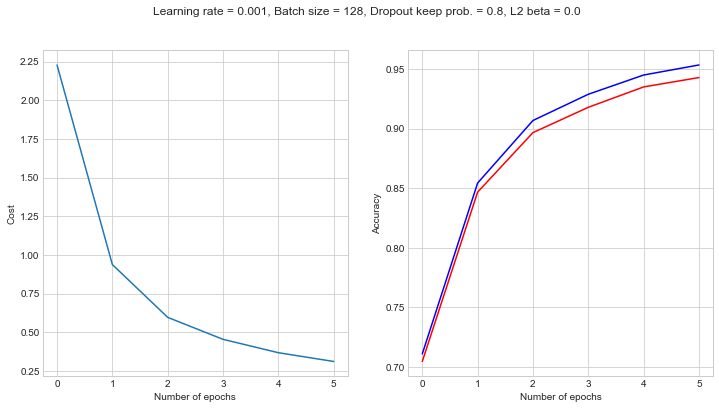

Multi-scale LeNet-5 Model
Start training model ...
Start epoch 0 ... training time: 28.179s, compute accuracy time: 15.546s
Summary of epoch  0: cost =   2.06721669, training accuracy = 0.7683, validation accuracy = 0.7600
Start epoch 1 ... training time: 28.483s, compute accuracy time: 14.262s
Summary of epoch  1: cost =   0.85684097, training accuracy = 0.8700, validation accuracy = 0.8649
Start epoch 2 ... training time: 28.056s, compute accuracy time: 13.953s
Summary of epoch  2: cost =   0.55752626, training accuracy = 0.9132, validation accuracy = 0.9009
Start epoch 3 ... training time: 27.645s, compute accuracy time: 13.818s
Summary of epoch  3: cost =   0.41480202, training accuracy = 0.9352, validation accuracy = 0.9260
Start epoch 4 ... training time: 27.528s, compute accuracy time: 15.429s
Summary of epoch  4: cost =   0.33790421, training accuracy = 0.9510, validation accuracy = 0.9380
Start epoch 5 ... training time: 30.354s, compute accuracy time: 14.257s
Summary of epoch

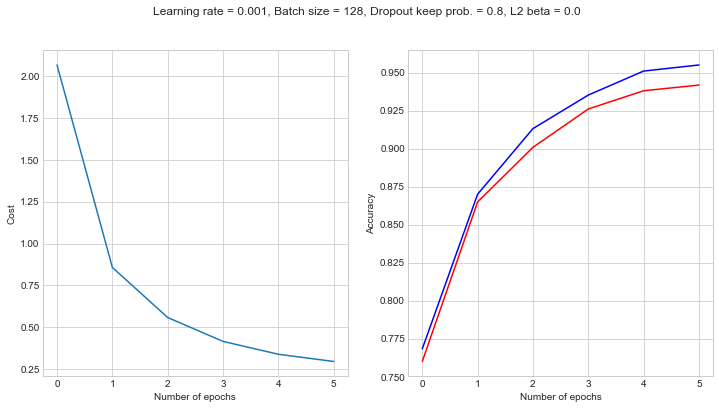

Multi-scale LeNet-4 Model
Start training model ...
Start epoch 0 ... training time: 29.399s, compute accuracy time: 15.591s
Summary of epoch  0: cost =   1.80802301, training accuracy = 0.8200, validation accuracy = 0.8113
Start epoch 1 ... training time: 29.338s, compute accuracy time: 15.513s
Summary of epoch  1: cost =   0.67957882, training accuracy = 0.9061, validation accuracy = 0.8989
Start epoch 2 ... training time: 30.911s, compute accuracy time: 14.269s
Summary of epoch  2: cost =   0.44603426, training accuracy = 0.9311, validation accuracy = 0.9206
Start epoch 3 ... training time: 30.065s, compute accuracy time: 15.602s
Summary of epoch  3: cost =   0.34205875, training accuracy = 0.9469, validation accuracy = 0.9340
Start epoch 4 ... training time: 28.727s, compute accuracy time: 15.142s
Summary of epoch  4: cost =   0.27093643, training accuracy = 0.9543, validation accuracy = 0.9388
Start epoch 5 ... training time: 28.494s, compute accuracy time: 15.106s
Summary of epoch

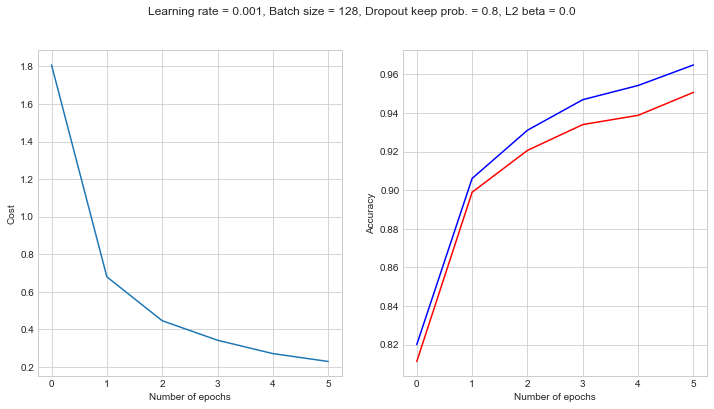

In [14]:
X_train, X_valid, X_test = initialize_data1(train["features"], valid["features"], test["features"])

# modified LeNet-5
print ("LeNet-5 Model")
parameters = model_LeNet("LeNet5", X_train, y_train, X_valid, y_valid)

print ("Multi-scale LeNet-5 Model")
parameters = model_LeNet("msLeNet5", X_train, y_train, X_valid, y_valid)

print ("Multi-scale LeNet-4 Model")
parameters = model_LeNet("msLeNet4", X_train, y_train, X_valid, y_valid)

#### Observation of the first attempt

The performance is generally good: the training error is within 5% and the validation error is below 10%.
Surprisingly, multi-scale LeNet-4 slightly outperforms the milti-scale LeNet-5.
There is a moderate overfitting as the validation error is 1 % lower than the training error, suggesting the need for stronger regularizations.

The timing for all three cases look very similar, which is not all that surprising because the fully connected layers are generally small.

The most promising model seems to be the **multi-scale LeNet-4 model**, which I will use for the following hyperparameter tuning.

But first, let me increase the number of features to (12, 32) or (22, 38) in the convolution layers.

Multi-scale LeNet-4 Model, conv. features: 12, 32
Start training model ...
Start epoch 0 ... training time: 40.271s, compute accuracy time: 17.795s
Summary of epoch  0: cost =   1.97314531, training accuracy = 0.8054, validation accuracy = 0.8006
Start epoch 1 ... training time: 37.396s, compute accuracy time: 16.747s
Summary of epoch  1: cost =   0.74126700, training accuracy = 0.8917, validation accuracy = 0.8845
Start epoch 2 ... training time: 37.986s, compute accuracy time: 18.909s
Summary of epoch  2: cost =   0.47271846, training accuracy = 0.9313, validation accuracy = 0.9208
Start epoch 3 ... training time: 36.131s, compute accuracy time: 19.977s
Summary of epoch  3: cost =   0.34077423, training accuracy = 0.9519, validation accuracy = 0.9439
Start epoch 4 ... training time: 36.665s, compute accuracy time: 17.905s
Summary of epoch  4: cost =   0.27890297, training accuracy = 0.9647, validation accuracy = 0.9496
Start epoch 5 ... training time: 43.876s, compute accuracy time: 

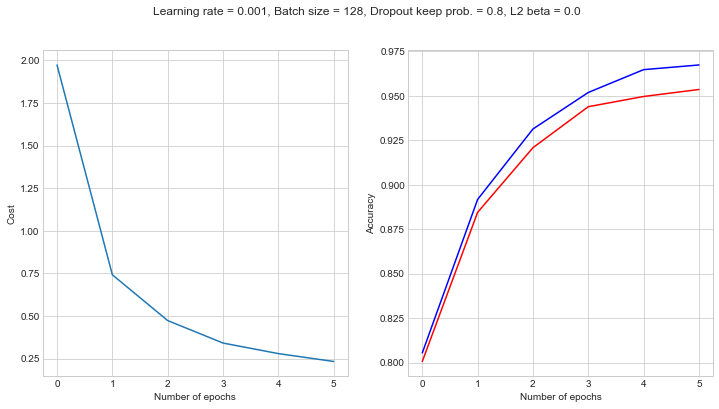

Multi-scale LeNet-4 Model, conv. features: 22, 38
Start training model ...
Start epoch 0 ... training time: 63.375s, compute accuracy time: 28.257s
Summary of epoch  0: cost =   1.58099813, training accuracy = 0.8602, validation accuracy = 0.8539
Start epoch 1 ... training time: 64.020s, compute accuracy time: 27.174s
Summary of epoch  1: cost =   0.49724336, training accuracy = 0.9373, validation accuracy = 0.9268
Start epoch 2 ... training time: 55.235s, compute accuracy time: 25.552s
Summary of epoch  2: cost =   0.31313811, training accuracy = 0.9596, validation accuracy = 0.9498
Start epoch 3 ... training time: 55.388s, compute accuracy time: 25.615s
Summary of epoch  3: cost =   0.22293533, training accuracy = 0.9689, validation accuracy = 0.9588
Start epoch 4 ... training time: 56.526s, compute accuracy time: 26.152s
Summary of epoch  4: cost =   0.17561650, training accuracy = 0.9773, validation accuracy = 0.9642
Start epoch 5 ... training time: 60.765s, compute accuracy time: 

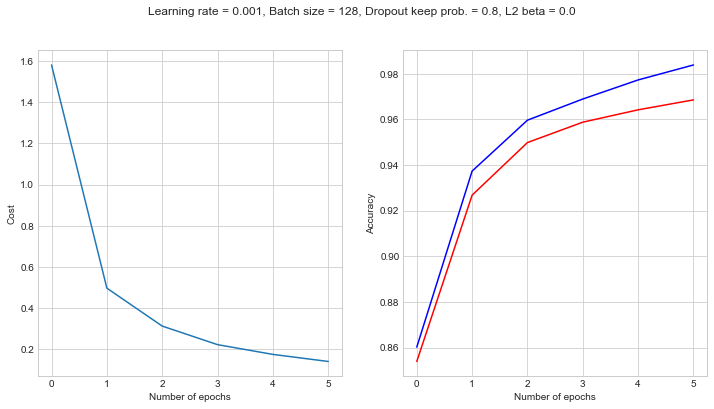

In [16]:
# multi-scale LeNet-4
print ("Multi-scale LeNet-4 Model, conv. features: 12, 32")
parameters = model_LeNet("msLeNet5", X_train, y_train, X_valid, y_valid, features=(12,32))

print ("Multi-scale LeNet-4 Model, conv. features: 22, 38")
parameters = model_LeNet("msLeNet4", X_train, y_train, X_valid, y_valid, features=(22,38))

#### Observation on increasing the number of features in convolution layers

Increase the number of features in the convolution layers improves the performance.
In fact, the combination given by the multi-scale paper does indeed perform very well.
However, it is generally too slow to run on my laptop.
Instead, I will use the feature combination **(12, 20)** to do the following tuning.

### Hyperparameter tuning

1. Preprocessing data
2. Learning rate
3. Regularization
    - Dropout keep probability
    - L2 regularization
4. Mini-batch size
5. Number of epochs

#### 1. Data Precprocessing

- Scheme 1: (pixel - 128) / 128
- Scheme 2: pixel / 255
- Scheme 3: Gray scaled image + Scheme 1
- Scheme 3: Gray scaled image + Scheme 2

Data preprocess scheme 1
Start training model ...
Start epoch 0 ... training time: 35.796s, compute accuracy time: 16.680s
Summary of epoch  0: cost =   1.67677683, training accuracy = 0.8119, validation accuracy = 0.8031
Start epoch 1 ... training time: 35.273s, compute accuracy time: 15.883s
Summary of epoch  1: cost =   0.60242422, training accuracy = 0.9187, validation accuracy = 0.9118
Start epoch 2 ... training time: 36.821s, compute accuracy time: 15.805s
Summary of epoch  2: cost =   0.39308030, training accuracy = 0.9391, validation accuracy = 0.9305
Start epoch 3 ... training time: 36.612s, compute accuracy time: 15.661s
Summary of epoch  3: cost =   0.29335641, training accuracy = 0.9564, validation accuracy = 0.9452
Start epoch 4 ... training time: 36.111s, compute accuracy time: 15.362s
Summary of epoch  4: cost =   0.22531715, training accuracy = 0.9673, validation accuracy = 0.9533
Start epoch 5 ... training time: 33.867s, compute accuracy time: 17.508s
Summary of epoch 

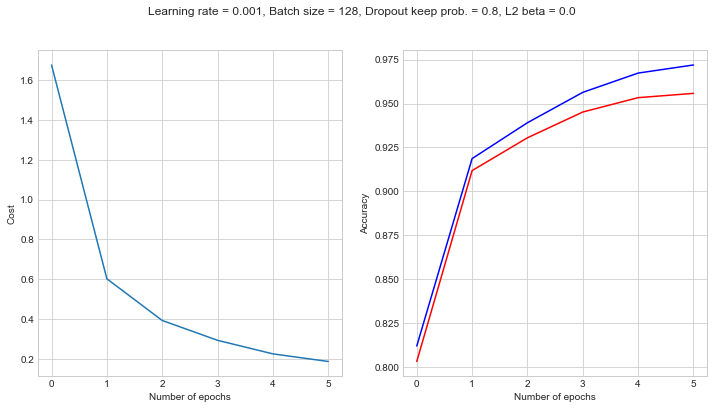

Data preprocess scheme 2
Start training model ...
Start epoch 0 ... training time: 38.665s, compute accuracy time: 16.098s
Summary of epoch  0: cost =   2.06955951, training accuracy = 0.7309, validation accuracy = 0.7256
Start epoch 1 ... training time: 40.113s, compute accuracy time: 16.604s
Summary of epoch  1: cost =   0.77677930, training accuracy = 0.8947, validation accuracy = 0.8900
Start epoch 2 ... training time: 38.149s, compute accuracy time: 15.851s
Summary of epoch  2: cost =   0.46816365, training accuracy = 0.9305, validation accuracy = 0.9222
Start epoch 3 ... training time: 36.401s, compute accuracy time: 15.384s
Summary of epoch  3: cost =   0.34688575, training accuracy = 0.9501, validation accuracy = 0.9393
Start epoch 4 ... training time: 34.060s, compute accuracy time: 15.336s
Summary of epoch  4: cost =   0.27779426, training accuracy = 0.9571, validation accuracy = 0.9428
Start epoch 5 ... training time: 35.328s, compute accuracy time: 15.394s
Summary of epoch 

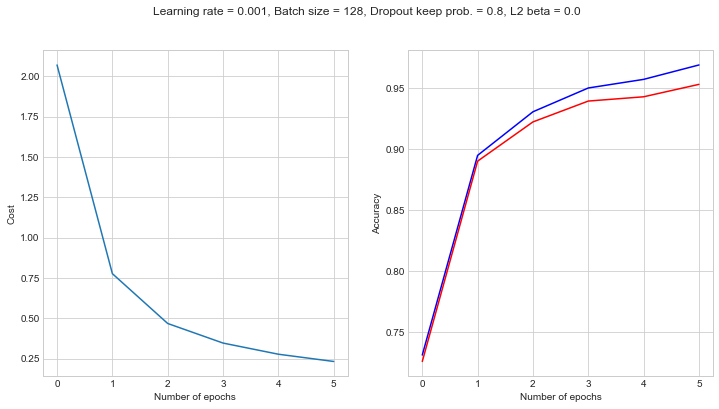

Data preprocess scheme 3
Start training model ...
Start epoch 0 ... training time: 25.629s, compute accuracy time: 11.800s
Summary of epoch  0: cost =   2.04013273, training accuracy = 0.7918, validation accuracy = 0.7815
Start epoch 1 ... training time: 26.482s, compute accuracy time: 11.508s
Summary of epoch  1: cost =   0.74842081, training accuracy = 0.8942, validation accuracy = 0.8860
Start epoch 2 ... training time: 27.363s, compute accuracy time: 10.193s
Summary of epoch  2: cost =   0.48404262, training accuracy = 0.9210, validation accuracy = 0.9109
Start epoch 3 ... training time: 24.881s, compute accuracy time: 10.196s
Summary of epoch  3: cost =   0.36841108, training accuracy = 0.9402, validation accuracy = 0.9267
Start epoch 4 ... training time: 24.843s, compute accuracy time: 10.780s
Summary of epoch  4: cost =   0.30187831, training accuracy = 0.9542, validation accuracy = 0.9405
Start epoch 5 ... training time: 27.694s, compute accuracy time: 10.115s
Summary of epoch 

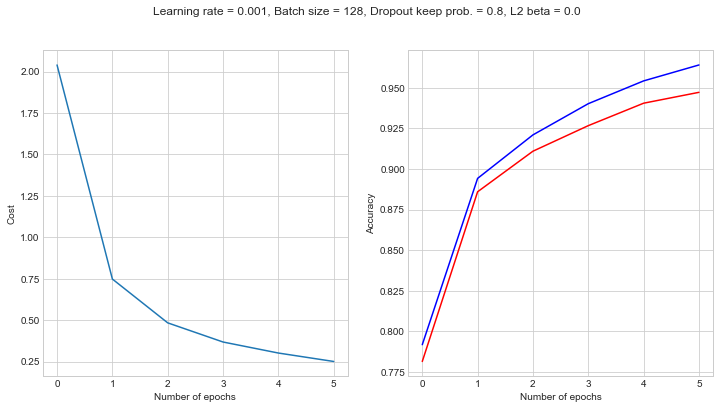

Data preprocess scheme 4
Start training model ...
Start epoch 0 ... training time: 27.717s, compute accuracy time: 11.187s
Summary of epoch  0: cost =   2.34982915, training accuracy = 0.7243, validation accuracy = 0.7164
Start epoch 1 ... training time: 32.039s, compute accuracy time: 11.739s
Summary of epoch  1: cost =   1.00477865, training accuracy = 0.8524, validation accuracy = 0.8450
Start epoch 2 ... training time: 29.706s, compute accuracy time: 11.608s
Summary of epoch  2: cost =   0.65567845, training accuracy = 0.8910, validation accuracy = 0.8770
Start epoch 3 ... training time: 28.241s, compute accuracy time: 11.446s
Summary of epoch  3: cost =   0.50198584, training accuracy = 0.9159, validation accuracy = 0.9007
Start epoch 4 ... training time: 29.301s, compute accuracy time: 12.551s
Summary of epoch  4: cost =   0.41015825, training accuracy = 0.9378, validation accuracy = 0.9226
Start epoch 5 ... training time: 28.094s, compute accuracy time: 11.481s
Summary of epoch 

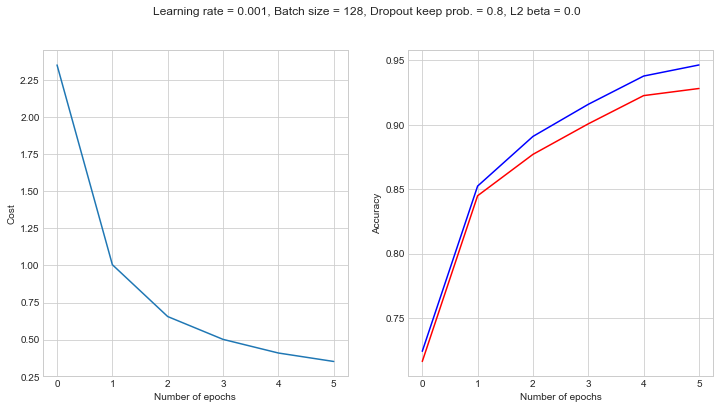

In [19]:
print ("Data preprocess scheme 1");
X_train, X_valid, X_test = initialize_data1(train["features"], valid["features"], test["features"])
parameters = model_LeNet("msLeNet4", X_train, y_train, X_valid, y_valid, features=(12,20))

print ("Data preprocess scheme 2");
X_train, X_valid, X_test = initialize_data2(train["features"], valid["features"], test["features"])
parameters = model_LeNet("msLeNet4", X_train, y_train, X_valid, y_valid, features=(12,20))

print ("Data preprocess scheme 3");
X_train, X_valid, X_test = initialize_data_g1(train["features"], valid["features"], test["features"])
parameters = model_LeNet("msLeNet4", X_train, y_train, X_valid, y_valid, features=(12,20))

print ("Data preprocess scheme 4");
X_train, X_valid, X_test = initialize_data_g2(train["features"], valid["features"], test["features"])
parameters = model_LeNet("msLeNet4", X_train, y_train, X_valid, y_valid, features=(12,20))

#### Observation from data preprocessing

Comparing Scheme 1 and Scheme 2, we find that they perform similarly, but Scheme 2 has a less severe overfitting problem.

Comparing Scheme 1 to Scheme 3 (or Scheme 2 to Scheme 4), we find that using gray scaled images gives slightly worse results but does improve the timings quite a bit.

Overall, I decide to use **gray-scaled images combined with normalization Scheme 1**.

#### 2. Learning rate

Learning rate is arguably the most important hyperparameter to choose.
In the model, I set the default value to 0.001, which yield reasonably good results.

Here is a list of learning rates for testing.
- 0.002
- 0.001 (tested above, default value)
- 0.0005
- 0.001 with exponential decay

Learning rate = 0.002
Start training model ...
Start epoch 0 ... training time: 26.653s, compute accuracy time: 11.318s
Summary of epoch  0: cost =   1.38290639, training accuracy = 0.8880, validation accuracy = 0.8777
Start epoch 1 ... training time: 25.997s, compute accuracy time: 12.154s
Summary of epoch  1: cost =   0.44883547, training accuracy = 0.9417, validation accuracy = 0.9260
Start epoch 2 ... training time: 26.945s, compute accuracy time: 11.041s
Summary of epoch  2: cost =   0.29849290, training accuracy = 0.9567, validation accuracy = 0.9403
Start epoch 3 ... training time: 25.704s, compute accuracy time: 10.616s
Summary of epoch  3: cost =   0.23010059, training accuracy = 0.9714, validation accuracy = 0.9523
Start epoch 4 ... training time: 26.001s, compute accuracy time: 10.715s
Summary of epoch  4: cost =   0.18250195, training accuracy = 0.9753, validation accuracy = 0.9562
Start epoch 5 ... training time: 26.162s, compute accuracy time: 10.718s
Summary of epoch  5:

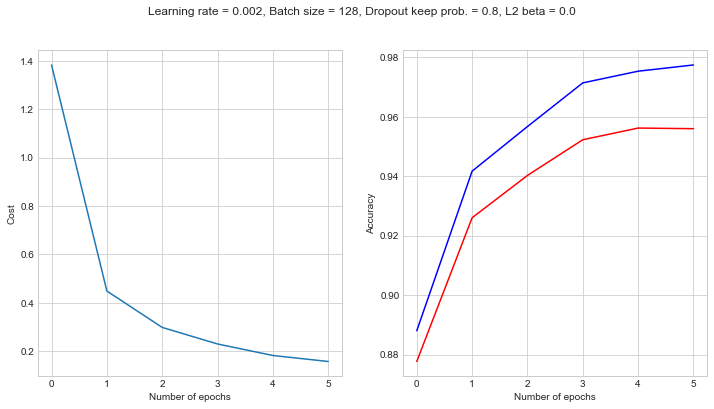

Learning rate = 0.0005
Start training model ...
Start epoch 0 ... training time: 27.271s, compute accuracy time: 10.407s
Summary of epoch  0: cost =   2.41944670, training accuracy = 0.6991, validation accuracy = 0.6944
Start epoch 1 ... training time: 25.295s, compute accuracy time: 10.744s
Summary of epoch  1: cost =   1.07280966, training accuracy = 0.8361, validation accuracy = 0.8267
Start epoch 2 ... training time: 25.685s, compute accuracy time: 10.914s
Summary of epoch  2: cost =   0.70458997, training accuracy = 0.8810, validation accuracy = 0.8696
Start epoch 3 ... training time: 26.136s, compute accuracy time: 10.482s
Summary of epoch  3: cost =   0.53928432, training accuracy = 0.9143, validation accuracy = 0.8967
Start epoch 4 ... training time: 27.798s, compute accuracy time: 10.422s
Summary of epoch  4: cost =   0.43622970, training accuracy = 0.9279, validation accuracy = 0.9131
Start epoch 5 ... training time: 26.815s, compute accuracy time: 10.665s
Summary of epoch  5

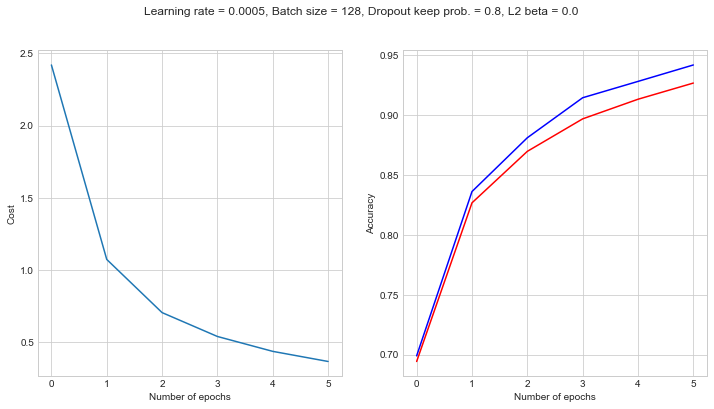

Initial learning rate = 0.001, exponential decay
Start training model ...
Start epoch 0 ... training time: 26.752s, compute accuracy time: 11.630s
Summary of epoch  0: cost =   1.88832671, training accuracy = 0.8275, validation accuracy = 0.8219
Start epoch 1 ... training time: 26.687s, compute accuracy time: 10.903s
Summary of epoch  1: cost =   0.66160740, training accuracy = 0.9104, validation accuracy = 0.9015
Start epoch 2 ... training time: 26.939s, compute accuracy time: 10.766s
Summary of epoch  2: cost =   0.43047541, training accuracy = 0.9381, validation accuracy = 0.9278
Start epoch 3 ... training time: 28.325s, compute accuracy time: 11.278s
Summary of epoch  3: cost =   0.32326617, training accuracy = 0.9552, validation accuracy = 0.9412
Start epoch 4 ... training time: 26.975s, compute accuracy time: 10.491s
Summary of epoch  4: cost =   0.26099789, training accuracy = 0.9593, validation accuracy = 0.9444
Start epoch 5 ... training time: 27.598s, compute accuracy time: 1

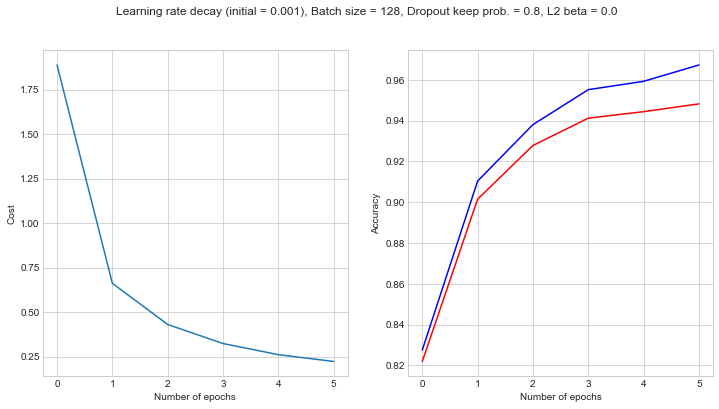

In [20]:
X_train, X_valid, X_test = initialize_data_g1(train["features"], valid["features"], test["features"])

# rate = 0.002
print ("Learning rate = 0.002")
parameters = model_LeNet("msLeNet4", X_train, y_train, X_valid, y_valid, features=(12,20), rate=0.002)

# rate = 0.0005
print ("Learning rate = 0.0005")
parameters = model_LeNet("msLeNet4", X_train, y_train, X_valid, y_valid, features=(12,20), rate=0.0005)

# rate = 0.001 with exponential decay
print ("Initial learning rate = 0.001, exponential decay")
parameters = model_LeNet("msLeNet4", X_train, y_train, X_valid, y_valid, features=(12,20), rate=0.001, rate_decay=True)

#### Obervate from tuning the learning rate

Comparing different learning rates (0.002, 0.001, 0.0005), we find 0.002 performs the best at the beginning, but the final results have a rather big variance problem.
Rate 0.0005 provides a smoother cost decreasing curve, which is good in general but it also means more epochs are required to reach desirable performance.
The 0.001 exponential decay performs better than the straightly 0.0005, and it is as good as non-decay 0.001.

Overall, I decide to use a learning rate of **0.002 with exponential decay (0.96 decay rate, default)**.

#### 3. Regularization

As mentioned above, the model seems overfitting the training data with a moderate drop-out probability.

To have a stronger regularization, we need to decrease the dropout keep probability and increase the L2 regularization.

- keep_prob = 0.8, L2_beta = 0.0
- keep_prob = 0.5, L2_beta = 0.0
- keep_prob = 0.8, L2_beta = 0.01

Dropout keep_prob = 0.8, L2 beta = 0.0
Start training model ...
Start epoch 0 ... training time: 27.006s, compute accuracy time: 11.570s
Summary of epoch  0: cost =   1.47229761, training accuracy = 0.8828, validation accuracy = 0.8735
Start epoch 1 ... training time: 25.209s, compute accuracy time: 10.198s
Summary of epoch  1: cost =   0.44900609, training accuracy = 0.9332, validation accuracy = 0.9197
Start epoch 2 ... training time: 25.094s, compute accuracy time: 10.214s
Summary of epoch  2: cost =   0.29542421, training accuracy = 0.9604, validation accuracy = 0.9470
Start epoch 3 ... training time: 25.050s, compute accuracy time: 11.409s
Summary of epoch  3: cost =   0.22922666, training accuracy = 0.9648, validation accuracy = 0.9514
Start epoch 4 ... training time: 25.882s, compute accuracy time: 10.452s
Summary of epoch  4: cost =   0.20119556, training accuracy = 0.9734, validation accuracy = 0.9540
Start epoch 5 ... training time: 25.003s, compute accuracy time: 10.406s
Sum

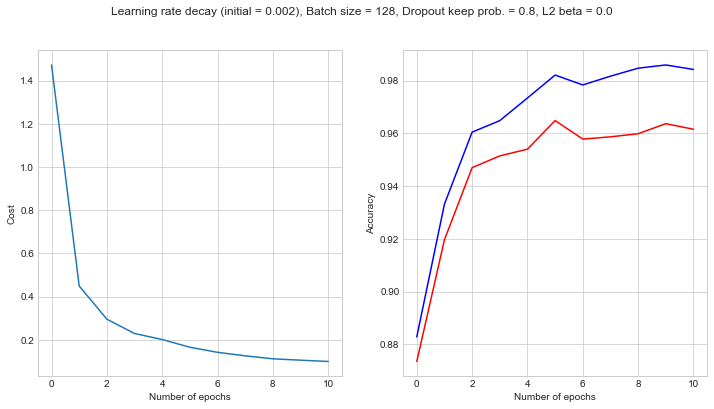

Dropout keep_prob = 0.5, L2 beta = 0.0
Start training model ...
Start epoch 0 ... training time: 25.916s, compute accuracy time: 10.394s
Summary of epoch  0: cost =   1.99106179, training accuracy = 0.8083, validation accuracy = 0.7988
Start epoch 1 ... training time: 25.144s, compute accuracy time: 10.309s
Summary of epoch  1: cost =   0.87798141, training accuracy = 0.8999, validation accuracy = 0.8886
Start epoch 2 ... training time: 25.339s, compute accuracy time: 10.250s
Summary of epoch  2: cost =   0.62749935, training accuracy = 0.9344, validation accuracy = 0.9236
Start epoch 3 ... training time: 25.363s, compute accuracy time: 10.260s
Summary of epoch  3: cost =   0.50285580, training accuracy = 0.9458, validation accuracy = 0.9339
Start epoch 4 ... training time: 25.422s, compute accuracy time: 10.330s
Summary of epoch  4: cost =   0.44093622, training accuracy = 0.9545, validation accuracy = 0.9423
Start epoch 5 ... training time: 25.095s, compute accuracy time: 10.213s
Sum

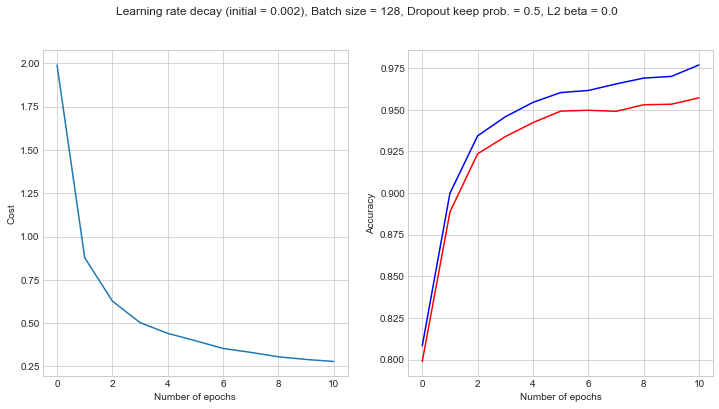

Dropout keep_prob = 0.8, L2 beta = 0.01
Start training model ...
Start epoch 0 ... training time: 28.470s, compute accuracy time: 12.369s
Summary of epoch  0: cost =   2.23074506, training accuracy = 0.8462, validation accuracy = 0.8396
Start epoch 1 ... training time: 31.809s, compute accuracy time: 12.014s
Summary of epoch  1: cost =   1.33446530, training accuracy = 0.8770, validation accuracy = 0.8681
Start epoch 2 ... training time: 27.279s, compute accuracy time: 10.659s
Summary of epoch  2: cost =   1.21904225, training accuracy = 0.8704, validation accuracy = 0.8598
Start epoch 3 ... training time: 27.365s, compute accuracy time: 11.100s
Summary of epoch  3: cost =   1.16862527, training accuracy = 0.8778, validation accuracy = 0.8668
Start epoch 4 ... training time: 28.048s, compute accuracy time: 10.233s
Summary of epoch  4: cost =   1.15426299, training accuracy = 0.8751, validation accuracy = 0.8655
Start epoch 5 ... training time: 29.583s, compute accuracy time: 11.426s
Su

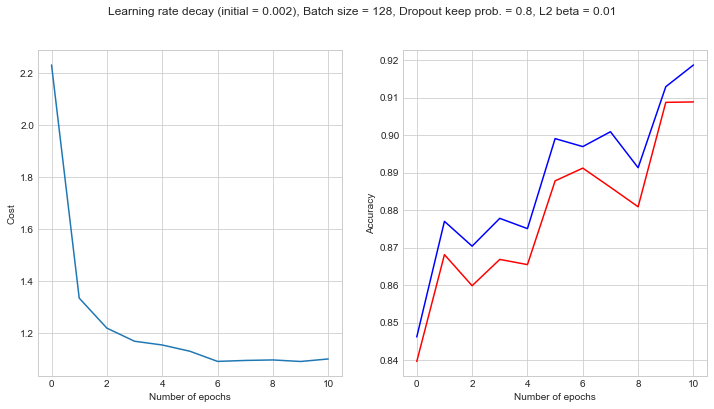

In [24]:
print ("Dropout keep_prob = 0.8, L2 beta = 0.0")
parameters = model_LeNet("msLeNet4", X_train, y_train, X_valid, y_valid, features=(12,20), rate=0.002,
                         rate_decay=True, keep_prob_value=0.8, L2_beta=0.0, epochs=11)

print ("Dropout keep_prob = 0.5, L2 beta = 0.0")
parameters = model_LeNet("msLeNet4", X_train, y_train, X_valid, y_valid, features=(12,20), rate=0.002,
                         rate_decay=True, keep_prob_value=0.5, L2_beta=0.0, epochs=11)

print ("Dropout keep_prob = 0.8, L2 beta = 0.01")
parameters = model_LeNet("msLeNet4", X_train, y_train, X_valid, y_valid, features=(12,20), rate=0.002,
                         rate_decay=True, keep_prob_value=0.8, L2_beta=0.01, epochs=11)

#### Obervation on regularizations

We see both dropout 0.5 and L2 0.01 do help improve the overfitting.

Since applying regularizations give a worse starting point, it might be useful to turn off learning rate decay and increase the number of epochs.

Overall, I decide use **dropout 0.65, no L2 regularization and use a bigger exponential decay (0.99)**.

#### 4. Mini-batch sizes

Mini-batch sizes may also change the performance.
Here is the list of sizes I tried:
- 64
- 128
- 192

Start training model ...
Start epoch 0 ... training time: 28.427s, compute accuracy time: 11.479s
Summary of epoch  0: cost =   1.34345552, training accuracy = 0.8941, validation accuracy = 0.8851
Start epoch 1 ... training time: 30.596s, compute accuracy time: 10.155s
Summary of epoch  1: cost =   0.50315531, training accuracy = 0.9331, validation accuracy = 0.9225
Start epoch 2 ... training time: 30.405s, compute accuracy time: 10.959s
Summary of epoch  2: cost =   0.37399494, training accuracy = 0.9534, validation accuracy = 0.9423
Start epoch 3 ... training time: 28.127s, compute accuracy time: 10.823s
Summary of epoch  3: cost =   0.31022483, training accuracy = 0.9595, validation accuracy = 0.9429
Start epoch 4 ... training time: 27.938s, compute accuracy time: 11.285s
Summary of epoch  4: cost =   0.26462655, training accuracy = 0.9688, validation accuracy = 0.9531
Start epoch 5 ... training time: 29.991s, compute accuracy time: 11.518s
Summary of epoch  5: cost =   0.23966575, 

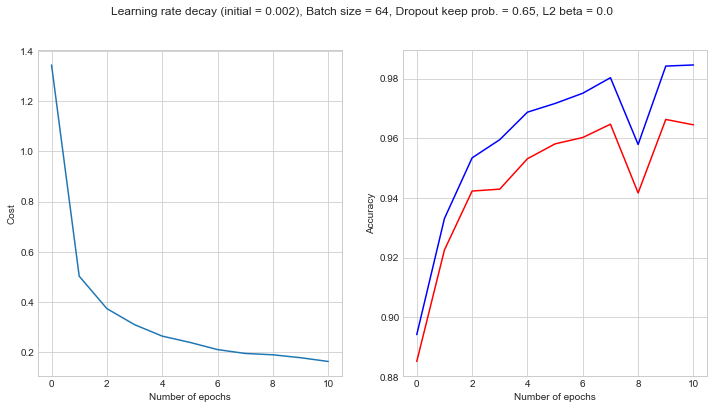

Start training model ...
Start epoch 0 ... training time: 34.157s, compute accuracy time: 11.852s
Summary of epoch  0: cost =   1.59536555, training accuracy = 0.8790, validation accuracy = 0.8697
Start epoch 1 ... training time: 27.754s, compute accuracy time: 12.927s
Summary of epoch  1: cost =   0.55471983, training accuracy = 0.9295, validation accuracy = 0.9202
Start epoch 2 ... training time: 34.183s, compute accuracy time: 13.848s
Summary of epoch  2: cost =   0.37159564, training accuracy = 0.9541, validation accuracy = 0.9406
Start epoch 3 ... training time: 31.884s, compute accuracy time: 13.971s
Summary of epoch  3: cost =   0.29638711, training accuracy = 0.9612, validation accuracy = 0.9467
Start epoch 4 ... training time: 32.528s, compute accuracy time: 12.707s
Summary of epoch  4: cost =   0.24875477, training accuracy = 0.9721, validation accuracy = 0.9586
Start epoch 5 ... training time: 31.597s, compute accuracy time: 13.218s
Summary of epoch  5: cost =   0.21316206, 

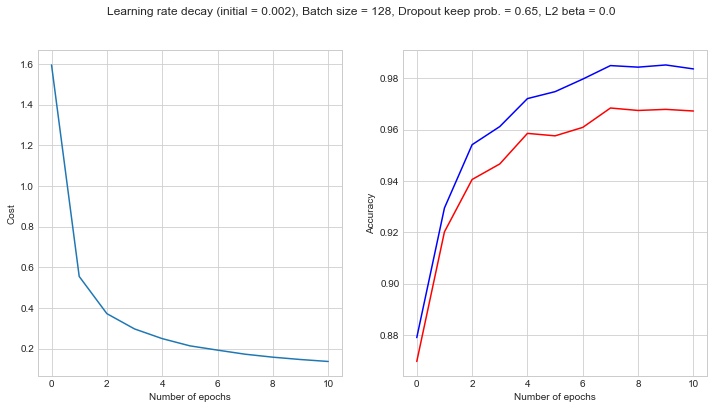

Start training model ...
Start epoch 0 ... training time: 31.457s, compute accuracy time: 14.067s
Summary of epoch  0: cost =   1.79568832, training accuracy = 0.8475, validation accuracy = 0.8405
Start epoch 1 ... training time: 30.781s, compute accuracy time: 13.021s
Summary of epoch  1: cost =   0.65313839, training accuracy = 0.9017, validation accuracy = 0.8916
Start epoch 2 ... training time: 30.063s, compute accuracy time: 12.648s
Summary of epoch  2: cost =   0.43879097, training accuracy = 0.9403, validation accuracy = 0.9254
Start epoch 3 ... training time: 30.834s, compute accuracy time: 11.201s
Summary of epoch  3: cost =   0.34233254, training accuracy = 0.9531, validation accuracy = 0.9409
Start epoch 4 ... training time: 26.496s, compute accuracy time: 10.755s
Summary of epoch  4: cost =   0.28580487, training accuracy = 0.9677, validation accuracy = 0.9504
Start epoch 5 ... training time: 28.762s, compute accuracy time: 13.115s
Summary of epoch  5: cost =   0.24523838, 

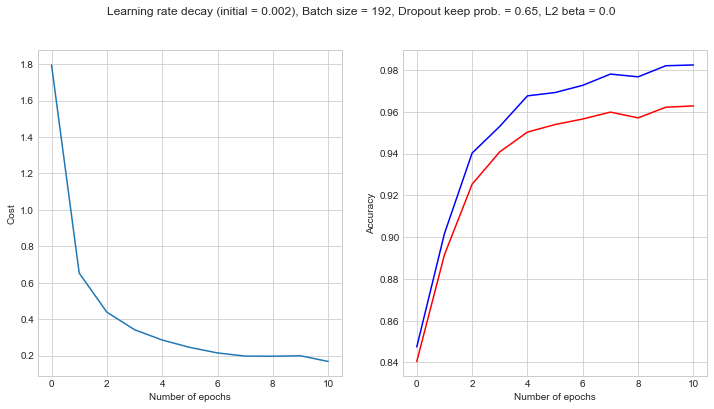

In [26]:
# size 64
parameters = model_LeNet("msLeNet4", X_train, y_train, X_valid, y_valid, features=(12,20), rate=0.002,
                         keep_prob_value=0.65, batch_size=64, rate_decay=True, decay_rate=0.99, epochs=11)

# size 128
parameters = model_LeNet("msLeNet4", X_train, y_train, X_valid, y_valid, features=(12,20), rate=0.002,
                         keep_prob_value=0.65, batch_size=128, rate_decay=True, decay_rate=0.99, epochs=11)

# size 192
parameters = model_LeNet("msLeNet4", X_train, y_train, X_valid, y_valid, features=(12,20), rate=0.002,
                         keep_prob_value=0.65, batch_size=192, rate_decay=True, decay_rate=0.99, epochs=11)

#### Obervation on mini-batch sizes

It seems the sweet spot is 128 as the mini-batch size, though the difference between these three are small.

#### 5. Number of epochs

To ensure the convergence, set number of epochs to a relative large number.
Practically, I set it to 41, which should be large enough to have a near converged model.

This time I will save the model as my final trained model to do the test.
Here is the list of hyperparameters:
- learning rate = 0.002 with exponential decay (decay rate = 0.99)
- dropout keep probability = 0.65, no L2 regularization
- mini-batch size = 128
- number of epochs = 41

Start training model ...
Start epoch 0 ... training time: 28.219s, compute accuracy time: 10.780s
Summary of epoch  0: cost =   1.67599412, training accuracy = 0.8587, validation accuracy = 0.8497
Start epoch 1 ... training time: 26.485s, compute accuracy time: 10.740s
Summary of epoch  1: cost =   0.59136596, training accuracy = 0.9281, validation accuracy = 0.9146
Start epoch 2 ... training time: 28.451s, compute accuracy time: 12.868s
Summary of epoch  2: cost =   0.40491139, training accuracy = 0.9485, validation accuracy = 0.9370
Start epoch 3 ... training time: 28.790s, compute accuracy time: 11.288s
Summary of epoch  3: cost =   0.32828403, training accuracy = 0.9604, validation accuracy = 0.9451
Start epoch 4 ... training time: 26.600s, compute accuracy time: 10.844s
Summary of epoch  4: cost =   0.27637088, training accuracy = 0.9652, validation accuracy = 0.9502
Start epoch 5 ... training time: 28.591s, compute accuracy time: 12.880s
Summary of epoch  5: cost =   0.23512195, 

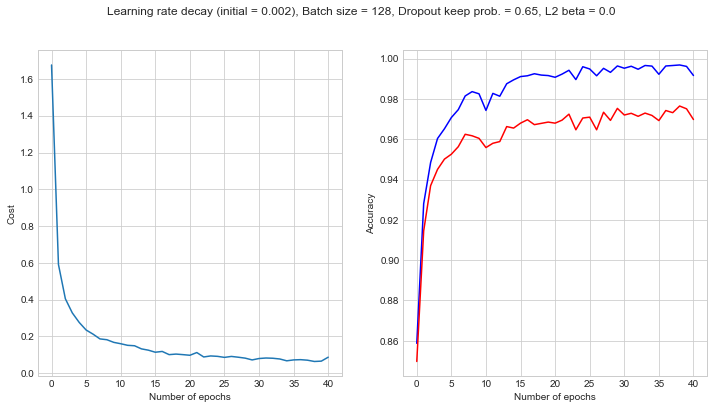

In [27]:
X_train, X_valid, X_test = initialize_data_g1(train["features"], valid["features"], test["features"])

parameters = model_LeNet("msLeNet4", X_train, y_train, X_valid, y_valid, features=(12,20), rate=0.002,
                         keep_prob_value=0.65, batch_size=128, rate_decay=True, decay_rate=0.99,
                         epochs=41, save_chkpt="LeNet4.chkpt")

#### Comment on the final trained model

Given 41 epochs, the training accuracy is **99.2 %** and the validation accuracy is **97.0 %**.
This shows the model is slightly overfitted.
Toward the end of the computation, the cost function starts to oscillate, which is a sign of near convergence and smaller learning rate may help in this scenario.

The learning curve also suggests epochs should be set to around 20 for hyperparameter tuning, which is a bit disappointing as it puts previous work almost in vain.
The lesson learned here is to use a combinatory approach for hyperparameter tuning.
But considering the computational power I have in hand, the result is not too bad.

### Model Testing

From the previous cell, the trained model has a training error of % and validation error of %.

The following cell use this trained model to run the test set.

In [29]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

def evaluate_test(X_test, Y_test, chkpt_name, parameters, batch_size = 128):
    """ Evaluate test set using the trained model.
    
    X_test -- test set
    Y_test -- test labels
    batch_size -- mini-batch size
    
    chkpt_name -- saved checkpoint model
    parameters -- saved parameters map
    """
    
    nexamples = len(X_test)
    tf.reset_default_graph()
    ops.reset_default_graph()
    
    # create placeholders
    nchannel = X_test.shape[-1]
    X, Y, Y_one_hot, keep_prob = create_placeholders([32, 32, nchannel], 43)
    
    logits = forward_propagation_msLeNet5(X, parameters, keep_prob, n_fc=1)
    
    # evaluate accuracy
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y_one_hot, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    total_accuracy = 0.0
    
    with tf.Session() as sess:
        saver = tf.train.import_meta_graph(chkpt_name + '.meta')
        saver.restore(sess, "./" + chkpt_name)

        for offset in range(0, nexamples, batch_size):
            end = offset + batch_size
            X_batch, Y_batch = X_test[offset:end], Y_test[offset:end]
            accuracy = sess.run(accuracy_operation, feed_dict={X: X_batch, Y: Y_batch, keep_prob: 1.0})

            size = batch_size
            if end >= nexamples:
                size = batch_size - end + nexamples
            total_accuracy += (accuracy * size)

        total_accuracy /= nexamples
        print ("Test accuracy: {0:.4f}.".format(total_accuracy))

X_test = preprocess_gray(test["features"])
evaluate_test(X_test, y_test, chkpt_name="LeNet4.chkpt", parameters=parameters)

Test accuracy: 0.9413.


#### Test accuracy

The test accuracy is **94.1 %**, which is not very far from the validation accuracy.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

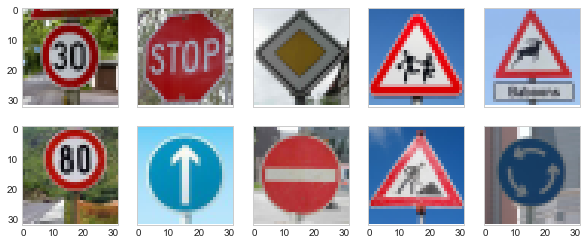

Original online test set shape: (10, 32, 32, 3)


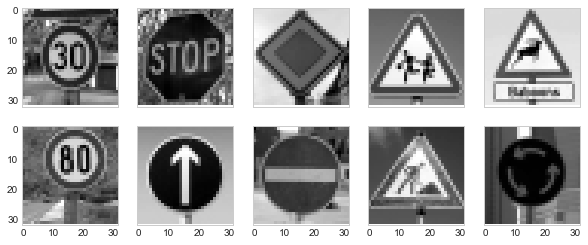

Gray-scaled online test set shape: (10, 32, 32, 1)


In [30]:
### Load the images and plot them here.

import glob

def load_online_images():
    X_test_online = None
    list_of_image_files = glob.glob("./traffic-signs-online/*.jpg")

    for file in list_of_image_files:
        image = cv2.imread(file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resized = cv2.resize(image, (32, 32), interpolation = cv2.INTER_AREA)
        if X_test_online is None:
            X_test_online = np.array([resized])
        else:
            X_test_online = np.append(X_test_online, [resized], axis=0)
    
    return X_test_online

def plot_online_images(gray=False):
    fig, axs = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(10, 4))
    for i in range(2):
        for j in range(5):
            image = X_test_online[i * 5 + j].squeeze()

            if gray:
                axs[i][j].imshow(image, cmap='gray')
            else:
                axs[i][j].imshow(image)

            axs[i][j].set_xticks([0, 10, 20, 30])
            axs[i][j].set_yticks([0, 10, 20, 30])

            axs[i][j].grid(False)
    plt.show()
    return

# plot original images
X_test_online = load_online_images()
plot_online_images()
print ("Original online test set shape:", X_test_online.shape)

# plot gray scaled images
X_test_online = preprocess_gray(X_test_online)
plot_online_images(True)
print ("Gray-scaled online test set shape:", X_test_online.shape)

In [57]:
def predict(X_test, chkpt_name, parameters):
    """ Predict using the trained model.
    
    X_test -- test set
    
    chkpt_name -- saved checkpoint model
    parameters -- saved parameters map
    """
    
    nexamples = len(X_test)
    tf.reset_default_graph()
    ops.reset_default_graph()
    
    # create placeholders
    nchannel = X_test.shape[-1]
    X, Y, Y_one_hot, keep_prob = create_placeholders([32, 32, nchannel], 43)
    
    # multi-scale LeNet-5 logits
    logits = forward_propagation_msLeNet5(X, parameters, keep_prob, n_fc=1)
    
    # top predictions
    top_k_operation = tf.nn.top_k(tf.nn.softmax(logits), k=5)
    predictions = []
    
    with tf.Session() as sess:
        saver = tf.train.import_meta_graph(chkpt_name + '.meta')
        saver.restore(sess, "./" + chkpt_name)

        top_k = sess.run(top_k_operation, feed_dict={X: X_test, keep_prob: 1.0})

        # show top guesses
        for i in range(nexamples):
            fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2,2))
            ax.imshow(X_test_online0[i])
            ax.set_xticks([0, 10, 20, 30])
            ax.set_yticks([0, 10, 20, 30])
            ax.grid(False)
            plt.show()
            
            print ("Top 5 guesses:")
            for j in range(5):
                guess = top_k[0][i][j]
                ID = top_k[1][i][j]
                description = "ID {0} {1}".format(ID, sign_names[ID])
                print ("{0:<55s}  {1:>8.4f}%".format(description, guess * 100.0))
                
                if j == 0:
                    predictions.append(ID)
                
    return predictions

### Predict the Sign Type for Each Image

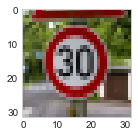

Top 5 guesses:
ID 1 Speed limit (30km/h)                                100.0000%
ID 0 Speed limit (20km/h)                                  0.0000%
ID 4 Speed limit (70km/h)                                  0.0000%
ID 5 Speed limit (80km/h)                                  0.0000%
ID 2 Speed limit (50km/h)                                  0.0000%


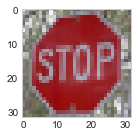

Top 5 guesses:
ID 14 Stop                                               100.0000%
ID 36 Go straight or right                                 0.0000%
ID 34 Turn left ahead                                      0.0000%
ID 17 No entry                                             0.0000%
ID 38 Keep right                                           0.0000%


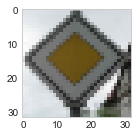

Top 5 guesses:
ID 12 Priority road                                      100.0000%
ID 40 Roundabout mandatory                                 0.0000%
ID 7 Speed limit (100km/h)                                 0.0000%
ID 38 Keep right                                           0.0000%
ID 13 Yield                                                0.0000%


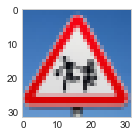

Top 5 guesses:
ID 28 Children crossing                                  100.0000%
ID 20 Dangerous curve to the right                         0.0000%
ID 30 Beware of ice/snow                                   0.0000%
ID 29 Bicycles crossing                                    0.0000%
ID 35 Ahead only                                           0.0000%


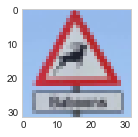

Top 5 guesses:
ID 29 Bicycles crossing                                   99.9999%
ID 20 Dangerous curve to the right                         0.0001%
ID 31 Wild animals crossing                                0.0000%
ID 30 Beware of ice/snow                                   0.0000%
ID 25 Road work                                            0.0000%


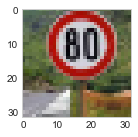

Top 5 guesses:
ID 36 Go straight or right                                46.6745%
ID 38 Keep right                                          18.6910%
ID 13 Yield                                               16.4677%
ID 34 Turn left ahead                                     10.6376%
ID 33 Turn right ahead                                     6.9866%


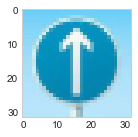

Top 5 guesses:
ID 35 Ahead only                                         100.0000%
ID 33 Turn right ahead                                     0.0000%
ID 37 Go straight or left                                  0.0000%
ID 34 Turn left ahead                                      0.0000%
ID 36 Go straight or right                                 0.0000%


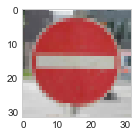

Top 5 guesses:
ID 17 No entry                                           100.0000%
ID 9 No passing                                            0.0000%
ID 33 Turn right ahead                                     0.0000%
ID 10 No passing for vehicles over 3.5 metric tons         0.0000%
ID 16 Vehicles over 3.5 metric tons prohibited             0.0000%


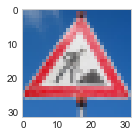

Top 5 guesses:
ID 25 Road work                                          100.0000%
ID 29 Bicycles crossing                                    0.0000%
ID 22 Bumpy road                                           0.0000%
ID 20 Dangerous curve to the right                         0.0000%
ID 30 Beware of ice/snow                                   0.0000%


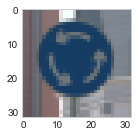

Top 5 guesses:
ID 7 Speed limit (100km/h)                                66.0065%
ID 40 Roundabout mandatory                                29.2978%
ID 12 Priority road                                        4.6955%
ID 5 Speed limit (80km/h)                                  0.0001%
ID 2 Speed limit (50km/h)                                  0.0000%


In [58]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

# Preprocess the images
X_test_online0 = load_online_images()
X_test_online = load_online_images()
X_test_online = preprocess_normalization1(preprocess_gray(X_test_online))

# predict
predictions = predict(X_test_online, "LeNet4.chkpt", parameters)

### Analyze Performance

In [59]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

correct_online_labels = [1, 14, 12, 28, 31, 5, 35, 17, 25, 40]

def calculate_online_accuracy(predictions, correct_online_labels):
    n = len(predictions)
    nc = 0
    for i, label in enumerate(predictions):
        if label == correct_online_labels[i]:
            nc += 1
    
    return nc / n

print ("Accuracy on images downloaded from internet: {:.2f}%".format(100 * calculate_online_accuracy(predictions, correct_online_labels)))

Accuracy on images downloaded from internet: 70.00%


#### Observation on the performance of online images

The accuracy is 70%, which is not very good.
However, I deliberately choose some difficult signs.
For example, the "wild animals crossing" sign is actually a reversed image as the head of deer should point to left.
The network does recognize this is a warning sign (triangle shape).

The image of "Speed limit 80 km/h" is also a difficult one.
First of all, the background is not very clean (green trees and a white stripe).
The sign is also not centered and has a large portion of the sign pole.

My only surprise is the last roundabout is falsely assigned.
It could be the background (a white stipe in the middle).
Again, the shape of the sign is predicted correctly.
In this case, training the network using color image should be helpful as the "Roundabout" sign is largely blue but "Speed limit" sign has a red circle.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

*This is down in above cells.*

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [128]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(sess, image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    
    activation = tf_activation.eval(session=sess,feed_dict={X: image_input, keep_prob: 1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        plt.grid(False)
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.show()

Falsely assigned roundabout sign
Gray-scaled image


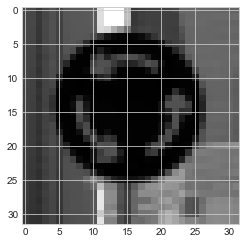

Convolution Layer 1


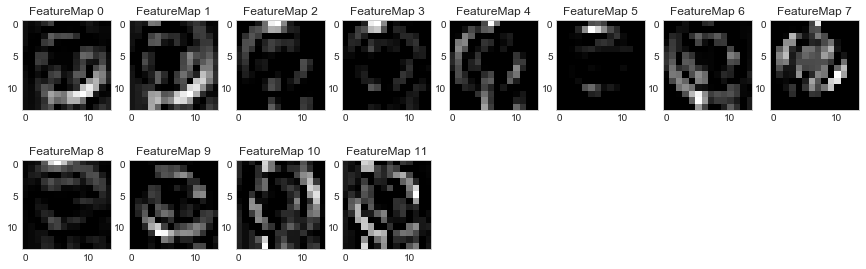

Convolution Layer 2


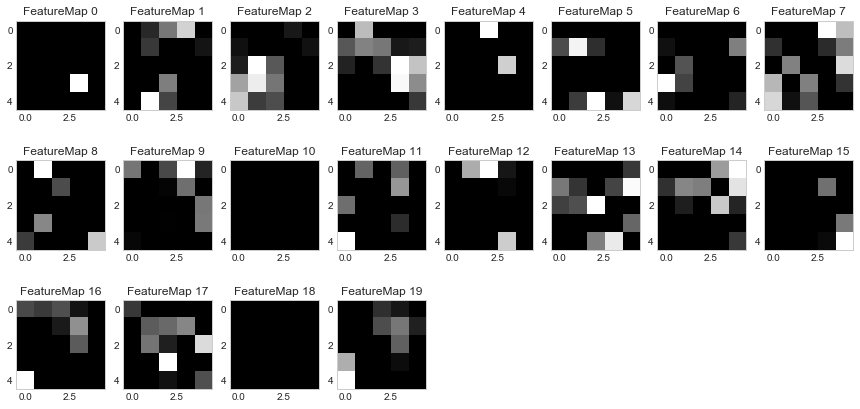

Now see an example of speed limit 100 km/h
Gray-scaled image


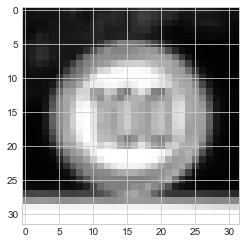

Convolution Layer 1


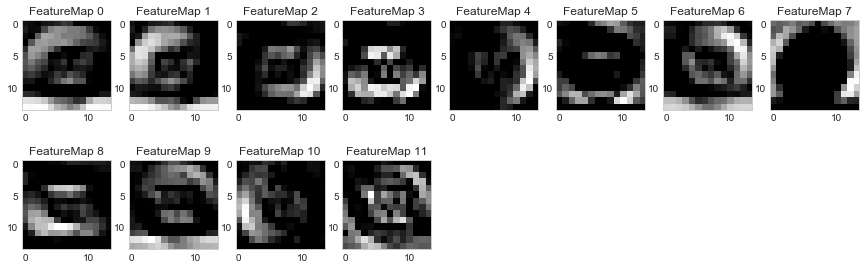

Convolution Layer 2


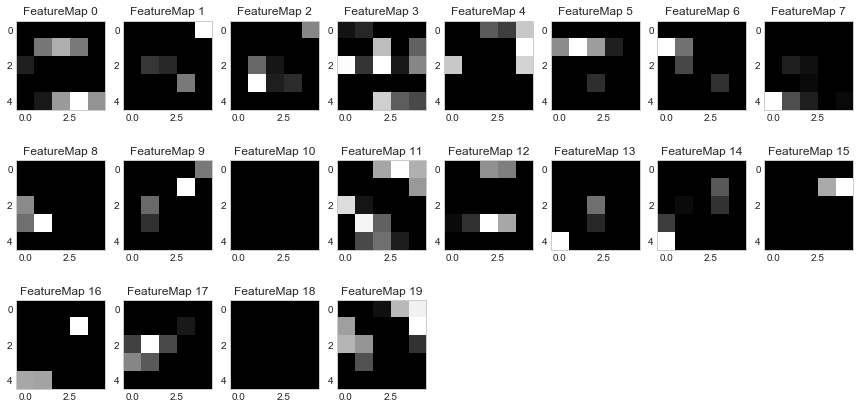

In [143]:
W1, b1 = parameters["W1"], parameters["b1"]
W2, b2 = parameters["W2"], parameters["b2"]
X, Y, Y_one_hot, keep_prob = create_placeholders([32,32,1], 43)

Z1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding="VALID")
Z1 = tf.nn.bias_add(Z1, b1)
A1 = tf.nn.relu(Z1)
A1 = tf.nn.max_pool(A1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

Z2 = tf.nn.conv2d(A1, W2, strides=[1,1,1,1], padding="VALID")
Z2 = tf.nn.bias_add(Z2, b2)
A2 = tf.nn.relu(Z2)
A2 = tf.nn.max_pool(A2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('LeNet4.chkpt.meta')
    saver.restore(sess, "./LeNet4.chkpt")
    
    print ("Falsely assigned roundabout sign")
    
    print ("Gray-scaled image")
    plt.imshow(X_test_online[-1].squeeze(), cmap="gray")
    plt.show()
    
    print ("Convolution Layer 1")
    outputFeatureMap(sess, np.array([X_test_online[-1]]), A1)
    
    print ("Convolution Layer 2")
    outputFeatureMap(sess, np.array([X_test_online[-1]]), A2)
    
    print ("Now see an example of speed limit 100 km/h")
    
    print ("Gray-scaled image")
    index = np.argwhere(y_valid == 7)[100]
    plt.imshow(X_valid[index].squeeze(), cmap="gray")
    plt.show()
    
    print ("Convolution Layer 1")
    outputFeatureMap(sess, np.array(X_valid[index]), A1)
    
    print ("Convolution Layer 2")
    outputFeatureMap(sess, np.array(X_valid[index]), A2)

#### Observation on the feature maps of the wrongly assigned roundabout sign

The feature maps between the roundabout sign and the 100 km/h speed limit sign look very similar, especially in the first convolution layer.
It is difficult to yield any conclusion from the second layer feature maps, but there are identical features (number 10 and 18).

# **Traffic Sign Recognition** 

## Writeup

### You can use this file as a template for your writeup if you want to submit it as a markdown file, but feel free to use some other method and submit a pdf if you prefer.

---

**Build a Traffic Sign Recognition Project**

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report


[//]: # (Image References)

[image1]: ./examples/visualization.jpg "Visualization"
[image2]: ./examples/grayscale.jpg "Grayscaling"
[image3]: ./examples/random_noise.jpg "Random Noise"
[image4]: ./examples/placeholder.png "Traffic Sign 1"
[image5]: ./examples/placeholder.png "Traffic Sign 2"
[image6]: ./examples/placeholder.png "Traffic Sign 3"
[image7]: ./examples/placeholder.png "Traffic Sign 4"
[image8]: ./examples/placeholder.png "Traffic Sign 5"

## Rubric Points
### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/481/view) individually and describe how I addressed each point in my implementation.  

---
### Writeup / README

#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one. You can submit your writeup as markdown or pdf. You can use this template as a guide for writing the report. The submission includes the project code.

You're reading it! and here is a link to my [project code](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb)

### Data Set Summary & Exploration

#### 1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I used the pandas library to calculate summary statistics of the traffic
signs data set:

* The size of training set is ?
* The size of the validation set is ?
* The size of test set is ?
* The shape of a traffic sign image is ?
* The number of unique classes/labels in the data set is ?

#### 2. Include an exploratory visualization of the dataset.

Here is an exploratory visualization of the data set. It is a bar chart showing how the data ...

![alt text][image1]

### Design and Test a Model Architecture

#### 1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

As a first step, I decided to convert the images to grayscale because ...

Here is an example of a traffic sign image before and after grayscaling.

![alt text][image2]

As a last step, I normalized the image data because ...

I decided to generate additional data because ... 

To add more data to the the data set, I used the following techniques because ... 

Here is an example of an original image and an augmented image:

![alt text][image3]

The difference between the original data set and the augmented data set is the following ... 


#### 2. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution 3x3     	| 1x1 stride, same padding, outputs 32x32x64 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 16x16x64 				|
| Convolution 3x3	    | etc.      									|
| Fully connected		| etc.        									|
| Softmax				| etc.        									|
|						|												|
|						|												|
 


#### 3. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

To train the model, I used an ....

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

My final model results were:
* training set accuracy of ?
* validation set accuracy of ? 
* test set accuracy of ?

If an iterative approach was chosen:
* What was the first architecture that was tried and why was it chosen?
* What were some problems with the initial architecture?
* How was the architecture adjusted and why was it adjusted? Typical adjustments could include choosing a different model architecture, adding or taking away layers (pooling, dropout, convolution, etc), using an activation function or changing the activation function. One common justification for adjusting an architecture would be due to overfitting or underfitting. A high accuracy on the training set but low accuracy on the validation set indicates over fitting; a low accuracy on both sets indicates under fitting.
* Which parameters were tuned? How were they adjusted and why?
* What are some of the important design choices and why were they chosen? For example, why might a convolution layer work well with this problem? How might a dropout layer help with creating a successful model?

If a well known architecture was chosen:
* What architecture was chosen?
* Why did you believe it would be relevant to the traffic sign application?
* How does the final model's accuracy on the training, validation and test set provide evidence that the model is working well?
 

### Test a Model on New Images

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are five German traffic signs that I found on the web:

![alt text][image4] ![alt text][image5] ![alt text][image6] 
![alt text][image7] ![alt text][image8]

The first image might be difficult to classify because ...

#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).

Here are the results of the prediction:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Stop Sign      		| Stop sign   									| 
| U-turn     			| U-turn 										|
| Yield					| Yield											|
| 100 km/h	      		| Bumpy Road					 				|
| Slippery Road			| Slippery Road      							|


The model was able to correctly guess 4 of the 5 traffic signs, which gives an accuracy of 80%. This compares favorably to the accuracy on the test set of ...

#### 3. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

The code for making predictions on my final model is located in the 11th cell of the Ipython notebook.

For the first image, the model is relatively sure that this is a stop sign (probability of 0.6), and the image does contain a stop sign. The top five soft max probabilities were

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| .60         			| Stop sign   									| 
| .20     				| U-turn 										|
| .05					| Yield											|
| .04	      			| Bumpy Road					 				|
| .01				    | Slippery Road      							|


For the second image ... 

### (Optional) Visualizing the Neural Network (See Step 4 of the Ipython notebook for more details)
#### 1. Discuss the visual output of your trained network's feature maps. What characteristics did the neural network use to make classifications?


